# Finance and Risk Analytics by:
- Divesh Gaba
- Garima Joshi
- Aparna

# Problem Statement:

In the recent past, the industry of wealth management has seen a lot of growth. Every individual or business actively searches for opportunities to get the maximum returns. However, in most of the cases, they either lack the skills to identify the right investment opportunity, or there is a shortage of time for finding these opportunities. Hence, this gave rise to the dedicated individuals who perform this task on behalf of the investors for a commission - Portfolio managers. A portfolio manager makes investment decisions and carries out other related activities on behalf of vested investors. They work with a team of analysts and researchers, and their main objective is to realise the needs of the investor and suggest a suitable portfolio that meets all the expectations. They are responsible for establishing the best investment strategy, selecting appropriate investments along with the right allocation. However, in doing so, they face a lot of competition in the form of other portfolio managers and rival firms. Therefore, the portfolio manager has to use the available resources to provide the best solution to the investor. Consider ourselves working for an associate at an investment firm that manages accounts for private clients. Our role requires you to analyse a portfolio of stocks to provide consultation on investment management based on client’s requirement.

# Business Requirement:
- Being a portfolio manager, the task is to provide consultation to two different investors, considered as Private Clients, i.e Mr Patrick Jyenger and Mr Peter Jyenger based on their requirements and financial objectives

- The primary goal of this Case Study:

* To Suggest a Portfolio of stocks to Mr Patrick Jyenger based on his risk profile to meet his goal on doubling the amount of 500K Dollars in five years of timespan to buy a minoruty stake in Naturo.

* To provide a High risk stock to Mr Peter Jyenger based on his risk profile to accomplish his goal on earning greater returns for the invested amount of 1 Million Dollars over a five years of timeframe to use it for the expansion of JWW.

In [788]:
# We will start our project by importing all of the important libraries.
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns


# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [789]:
# Importing all of the CSV files to merge them later.

American_Airlines = pd.read_csv("AAL.csv")
Allegiant_Travel = pd.read_csv("ALGT.csv")
Alaska_Air = pd.read_csv("ALk.csv")
Delta_AirLines = pd.read_csv("DAL.csv")
Hawaiian_Holdings = pd.read_csv("HA.csv")
Southwest_Airlines = pd.read_csv("LUV.csv")

Barclays = pd.read_csv("BCS.csv")
Credit_Suisse = pd.read_csv("CS.csv")
Deutsche_Bank = pd.read_csv("DB.csv")
Goldman_Sachs = pd.read_csv("GS.csv")
Morgan_Stanley = pd.read_csv("MS.csv")
Wells_Fargo = pd.read_csv("WFC.csv")

Johnson_and_Johnson = pd.read_csv("JNJ.csv")
Merck_and_CO = pd.read_csv("MRK.csv")
Pfizer = pd.read_csv("PFE.csv")
UnitedHealthGroup = pd.read_csv("UNH.csv")

Bausch_Health = pd.read_csv("BHC.csv")
Roche_Holding = pd.read_csv("RHHBY.csv")

Apple = pd.read_csv("AAPL.csv")
Amazon = pd.read_csv("AMZN.csv")
Facebook = pd.read_csv("FB.csv")
Google = pd.read_csv("GOOG.csv")
IBM = pd.read_csv("IBM.csv")
Microsoft = pd.read_csv("MSFT.csv")

SP500 = pd.read_csv("S&P500.csv")


In [790]:
# Here we are going to rename some of the important varaibles to identify the industries and companies.
American_Airlines = American_Airlines.rename(columns = {'Close': 'Aviation_AAL_Close','Volume': 'AAL_Volume'}, inplace = False)
Allegiant_Travel = Allegiant_Travel.rename(columns = {'Close': 'Aviation_ALGT_Close','Volume': 'ALGT_Volume'}, inplace = False)
Alaska_AirLk = Alaska_Air.rename(columns = {'Close': 'Aviation_ALS_Close','Volume': 'ALS_Volume'}, inplace = False)
Delta_AirLines = Delta_AirLines.rename(columns = {'Close': 'Aviation_DEL_Close','Volume': 'DEL_Volume'}, inplace = False)
Hawaiian_Holdings = Hawaiian_Holdings.rename(columns = {'Close': 'Aviation_HA_Close','Volume': 'HA_Volume'}, inplace = False)
Southwest_Airlines = Southwest_Airlines.rename(columns = {'Close': 'Aviation_SA_Close','Volume': 'SA_Volume'}, inplace = False)

Barclays = Barclays.rename(columns = {'Close': 'Finance_BAR_Close','Volume': 'BAR_Volume'}, inplace = False)
Credit_Suisse = Credit_Suisse.rename(columns = {'Close': 'Finance_CS_Close','Volume': 'CS_Volume'}, inplace = False)
Deutsche_Bank= Deutsche_Bank.rename(columns = {'Close': 'Finance_DB_Close','Volume': 'DB_Volume'}, inplace = False)
Goldman_Sachs = Goldman_Sachs.rename(columns = {'Close': 'Finance_GS_Close','Volume': 'GS_Volume'}, inplace = False)
Morgan_Stanley = Morgan_Stanley.rename(columns = {'Close': 'Finance_MS_Close','Volume': 'MS_Volume'}, inplace = False)
Wells_Fargo = Wells_Fargo.rename(columns = {'Close': 'Finance_WF_Close','Volume': 'WF_Volume' }, inplace = False)

Johnson_and_Johnson = Johnson_and_Johnson.rename(columns = {'Close': 'Health_JNJ_Close','Volume': 'JNJ_Volume'}, inplace = False)
Merck_and_CO = Merck_and_CO.rename(columns = {'Close': 'Health_MAC_Close','Volume': 'MAC_Volume'}, inplace = False)
Pfizer = Pfizer.rename(columns = {'Close': 'Health_PFE_Close','Volume': 'PFE_Volume'}, inplace = False)
UnitedHealthGroup = UnitedHealthGroup.rename(columns = {'Close': 'Health_UHG_Close','Volume': 'UHG_Volume'}, inplace = False)
Bausch_Health = Bausch_Health.rename(columns = {'Close': 'Health_BH_Close','Volume': 'BH_Volume'}, inplace = False)
Roche_Holding = Roche_Holding.rename(columns = {'Close': 'Health_RH_Close','Volume': 'RH_Volume'}, inplace = False)

Apple = Apple.rename(columns = {'Close': 'Tech_APL_Close','Volume': 'APL_Volume'}, inplace = False)
Amazon = Amazon.rename(columns = {'Close': 'Tech_AMZN_Close','Volume': 'AMZN_Volume'}, inplace = False)
Facebook = Facebook.rename(columns = {'Close': 'Tech_FB_Close','Volume': 'FB_Volume'}, inplace = False)
Google = Google.rename(columns = {'Close': 'Tech_GOOG_Close','Volume': 'GOOG_Volume'}, inplace = False)
IBM = IBM.rename(columns = {'Close': 'Tech_IBM_Close','Volume': 'IBM_Volume'}, inplace = False)
Microsoft = Microsoft.rename(columns = {'Close': 'Tech_MSFT_Close','Volume': 'MSFT_Volume'}, inplace = False)

SandP500 = SP500.rename(columns = {'Close': 'S&P500_Close','Volume': 'SNP500_Volume'}, inplace = False)

In [791]:
# Here, we are truncating our data with only close price, stock volume and date columns
SP500 = SandP500[['Date','S&P500_Close','SNP500_Volume']]
AAL = American_Airlines[['Date','Aviation_AAL_Close','AAL_Volume']]
ALGT = Allegiant_Travel[['Date','Aviation_ALGT_Close','ALGT_Volume']]
ALS = Alaska_AirLk[['Date','Aviation_ALS_Close','ALS_Volume']]
DEL = Delta_AirLines[['Date','Aviation_DEL_Close','DEL_Volume']]
HA = Hawaiian_Holdings[['Date','Aviation_HA_Close','HA_Volume']]
SA = Southwest_Airlines[['Date','Aviation_SA_Close','SA_Volume']]
BAR = Barclays[['Date','Finance_BAR_Close','BAR_Volume']]
CS = Credit_Suisse[['Date','Finance_CS_Close','CS_Volume']]
DB = Deutsche_Bank[['Date','Finance_DB_Close','DB_Volume']]
GS = Goldman_Sachs[['Date','Finance_GS_Close','GS_Volume']]
MS = Morgan_Stanley[['Date','Finance_MS_Close','MS_Volume']]
WF = Wells_Fargo[['Date','Finance_WF_Close','WF_Volume']]
BH = Bausch_Health[['Date','Health_BH_Close','BH_Volume']]
JNJ = Johnson_and_Johnson[['Date','Health_JNJ_Close','JNJ_Volume']]
MAC = Merck_and_CO[['Date','Health_MAC_Close','MAC_Volume']]
PFE = Pfizer[['Date','Health_PFE_Close','PFE_Volume']]
RH = Roche_Holding[['Date','Health_RH_Close','RH_Volume']]
UHG = UnitedHealthGroup[['Date','Health_UHG_Close','UHG_Volume']]
APL = Apple[['Date','Tech_APL_Close','APL_Volume']]
AMZN = Amazon[['Date','Tech_AMZN_Close','AMZN_Volume']]
FB = Facebook[['Date','Tech_FB_Close','FB_Volume']]
GOOG = Google[['Date','Tech_GOOG_Close','GOOG_Volume']]
IBM = IBM[['Date','Tech_IBM_Close','IBM_Volume']]
MSFT = Microsoft[['Date','Tech_MSFT_Close','MSFT_Volume']]


In [792]:
# Now is the time to merge all of the dataframe into one stock file.
stocks = pd.merge(SP500,  AAL,   how='left', on='Date')
stocks = pd.merge(stocks, ALGT,  how='left', on='Date')
stocks = pd.merge(stocks, ALS,   how='left', on='Date')
stocks = pd.merge(stocks, DEL,   how='left', on='Date')
stocks = pd.merge(stocks, HA,    how='left', on='Date')
stocks = pd.merge(stocks, SA,   how='left', on='Date')
 
stocks = pd.merge(stocks, BAR,   how='left', on='Date')
stocks = pd.merge(stocks, CS,    how='left', on='Date')
stocks = pd.merge(stocks, DB,    how='left', on='Date')
stocks = pd.merge(stocks, GS,    how='left', on='Date')
stocks = pd.merge(stocks, MS,    how='left', on='Date')
stocks = pd.merge(stocks, WF,   how='left', on='Date')

stocks = pd.merge(stocks, BH,   how='left', on='Date')
stocks = pd.merge(stocks, JNJ,   how='left', on='Date')
stocks = pd.merge(stocks, MAC,   how='left', on='Date')
stocks = pd.merge(stocks, PFE,   how='left', on='Date')
stocks = pd.merge(stocks, RH, how='left', on='Date')
stocks = pd.merge(stocks, UHG,   how='left', on='Date')

stocks = pd.merge(stocks, APL,  how='left', on='Date')
stocks = pd.merge(stocks, AMZN,  how='left', on='Date')
stocks = pd.merge(stocks, GOOG,  how='left', on='Date')
stocks = pd.merge(stocks, IBM,   how='left', on='Date')
stocks = pd.merge(stocks, MSFT,  how='left', on='Date')
stocks = pd.merge(stocks, FB,    how='left', on='Date')

In [793]:
# Changing the datatype of data column in our new dataframe
stocks["Date"]= pd.to_datetime(stocks["Date"], format='%d-%m-%Y')

In [794]:
# We will take the data only from 2016 to 2020 so that we can picutre the future closing price much better as compared to data from 2010-2020
stocks = stocks[stocks.Date.dt.year>2015]
stocks.reset_index(inplace = True)
stocks.drop("index", axis = 1, inplace = True)

In [795]:
# This is going to be our main file of dataset.
stocks.to_csv("Main_Data File_Stock.csv", index = False)

In [796]:
# Keeping all of the  stock volume column in a different variables
all_volume = stocks.iloc[:,2::2]
all_volume["Date"] = stocks["Date"]
all_volume.to_excel("All_Volume..xlsx", index=False)

In [797]:
# We have created different files for each industry because of the variations in the intial dates of the stock from each industries
# After importing them separately in the notebook, we will merge them on the basis of dates.
# We have noticed that the starting date of Facebook is most furthest among all of the organisations.
 # Here we will create different variables to store the stock data from different industries so that we can visualize and analyse data on the basis of indutries.
fin = stocks[["Date",'Finance_BAR_Close', 'BAR_Volume', 'Finance_CS_Close', 'CS_Volume',
       'Finance_DB_Close', 'DB_Volume', 'Finance_GS_Close', 'GS_Volume',
       'Finance_MS_Close', 'MS_Volume', 'Finance_WF_Close', 'WF_Volume',"S&P500_Close"]]
av = stocks[["Date",'Aviation_AAL_Close',
       'AAL_Volume', 'Aviation_ALGT_Close', 'ALGT_Volume',
       'Aviation_ALS_Close', 'ALS_Volume', 'Aviation_DEL_Close', 'DEL_Volume',
       'Aviation_HA_Close', 'HA_Volume', 'Aviation_SA_Close', 'SA_Volume',"S&P500_Close"]]
hea = stocks[["Date",'Health_BH_Close', 'BH_Volume', 'Health_JNJ_Close', 'JNJ_Volume',
       'Health_MAC_Close', 'MAC_Volume', 'Health_PFE_Close', 'PFE_Volume',
       'Health_RH_Close', 'RH_Volume', 'Health_UHG_Close', 'UHG_Volume',"S&P500_Close"]]
tech = stocks[["Date",'Tech_APL_Close', 'APL_Volume', 'Tech_AMZN_Close', 'AMZN_Volume',
       'Tech_GOOG_Close', 'GOOG_Volume', 'Tech_IBM_Close', 'IBM_Volume',
       'Tech_MSFT_Close', 'MSFT_Volume', 'Tech_FB_Close', 'FB_Volume',"S&P500_Close"]]
sp =  stocks[["Date",'S&P500_Close', 'SNP500_Volume']]

In [798]:
# close = fin.merge(av,on='Date', how='left').merge(hea,on='Date', how='left').merge(tech,on='Date', how='left').merge(sp,on='Date', how='left')
# close.head()

In [799]:
# close.isna().sum()

In [800]:
# Removing Missing Values from each DataFrame by reducing the number of rows to last five years.
# We are taking the data for the last years becuase we need to analyse our portfolio needs for the next 5 years.
# Past 5 years will be able to present much better picture and predict the stock bhaviour than the last 10 years.
fin = fin[fin.Date.dt.year>2015]
fin.reset_index(inplace = True)
fin.drop("index", axis = 1, inplace = True)

av  = av[av.Date.dt.year>2015]
av.reset_index(inplace = True)
av.drop("index", axis = 1, inplace = True)

hea = hea[hea.Date.dt.year>2015]
hea.reset_index(inplace = True)
hea.drop("index", axis = 1, inplace = True)

tech = tech[tech.Date.dt.year>2015]
tech.reset_index(inplace = True)
tech.drop("index", axis = 1, inplace = True)

sp = sp[sp.Date.dt.year>2015]
sp.reset_index(inplace = True)
sp.drop("index", axis = 1, inplace = True)


# close = close[close.Date.dt.year>22015]
# close.reset_index(inplace = True)
# close.drop("index", axis = 1, inplace = True)

In [801]:
stocks.isna().sum()

Date                   0
S&P500_Close           0
SNP500_Volume          0
Aviation_AAL_Close     0
AAL_Volume             0
Aviation_ALGT_Close    0
ALGT_Volume            0
Aviation_ALS_Close     0
ALS_Volume             0
Aviation_DEL_Close     0
DEL_Volume             0
Aviation_HA_Close      0
HA_Volume              0
Aviation_SA_Close      0
SA_Volume              0
Finance_BAR_Close      0
BAR_Volume             0
Finance_CS_Close       0
CS_Volume              0
Finance_DB_Close       0
DB_Volume              0
Finance_GS_Close       0
GS_Volume              0
Finance_MS_Close       0
MS_Volume              0
Finance_WF_Close       0
WF_Volume              0
Health_BH_Close        0
BH_Volume              0
Health_JNJ_Close       0
JNJ_Volume             0
Health_MAC_Close       0
MAC_Volume             0
Health_PFE_Close       0
PFE_Volume             0
Health_RH_Close        0
RH_Volume              0
Health_UHG_Close       0
UHG_Volume             0
Tech_APL_Close         0


# First we will start our undestanding with the our focus on each industry separatrly and then later will analyse all of the industry togetger.

In [802]:
# We will start our analysis with the Finane Industry
# Describing function shows us very important metrics of our closing prices
fin.describe()
# 1. We will see how the average price of each stock is very different from each other in terms of range.

Date  Finance_BAR_Close    BAR_Volume  \
count                           1195        1195.000000  1.195000e+03   
mean   2018-05-17 23:28:40.167363840           9.055238  4.168275e+06   
min              2016-01-04 00:00:00           3.840000  8.270000e+05   
25%              2017-03-11 12:00:00           8.010000  2.310500e+06   
50%              2018-05-17 00:00:00           9.200000  3.196300e+06   
75%              2019-07-25 12:00:00          10.620000  4.529250e+06   
max              2020-09-30 00:00:00          12.850000  1.496358e+08   
std                              NaN           1.911941  5.726528e+06   

       Finance_CS_Close     CS_Volume  Finance_DB_Close     DB_Volume  \
count       1195.000000  1.195000e+03       1195.000000  1.195000e+03   
mean          13.637498  3.403322e+06         12.894854  5.603090e+06   
min            6.670000  5.104000e+05          5.480000  0.000000e+00   
25%           11.915000  2.093800e+06          8.590000  3.285000e+06   
50%           13.580000  2.857700e+06         12.680000  4.686700e+06   
75%           15.325000  3.991150e+06         16.970000  6.535300e+06   
max           21.360001  1.776920e+07         23.490000  7.017620e+07   
std            2.476212  2.084255e+06          4.470114  4.104276e+06   

       Finance_GS_Close     GS_Volume  Finance_MS_Close     MS_Volume  \
count       1195.000000  1.195000e+03       1195.000000  1.195000e+03   
mean         208.595372  3.324992e+06         43.158937  1.158120e+07   
min          134.970001  4.677000e+05         21.690001  2.087800e+06   
25%          186.564995  2.316450e+06         40.330000  7.914900e+06   
50%          213.460007  2.904300e+06         44.430000  1.008360e+07   
75%          233.295006  3.798550e+06         49.135001  1.362165e+07   
max          273.380005  1.519420e+07         58.910000  5.853350e+07   
std           31.998671  1.593856e+06          8.599035  5.607637e+06   

       Finance_WF_Close     WF_Volume  S&P500_Close  
count       1195.000000  1.195000e+03   1195.000000  
mean          48.755941  2.414500e+07   2638.213655  
min           22.530001  4.635500e+06   1829.079956  
25%           47.080000  1.591165e+07   2352.054931  
50%           50.490002  1.954110e+07   2682.620117  
75%           54.445000  2.738020e+07   2901.324951  
max           65.930000  1.189526e+08   3580.840088  
std            9.318783  1.360363e+07    382.916992

In [803]:
desc = fin.describe()
index = desc.columns
index[1:]

Index(['Finance_BAR_Close', 'BAR_Volume', 'Finance_CS_Close', 'CS_Volume',
       'Finance_DB_Close', 'DB_Volume', 'Finance_GS_Close', 'GS_Volume',
       'Finance_MS_Close', 'MS_Volume', 'Finance_WF_Close', 'WF_Volume',
       'S&P500_Close'],
      dtype='object')

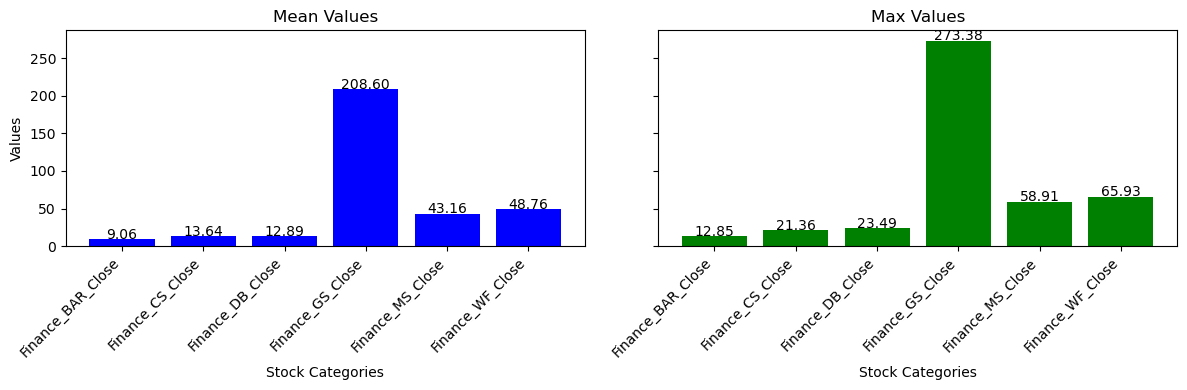

In [804]:
# import matplotlib.pyplot as plt

# Define the categories for the x-axis
categories = ['Finance_BAR_Close','Finance_CS_Close',
       'Finance_DB_Close', 'Finance_GS_Close',
       'Finance_MS_Close', 'Finance_WF_Close']
# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

# Plot Dataset 1 (Mean values)
bars1 = axes[0].bar(categories, desc.loc["mean", categories], color='b')
axes[0].set_title("Mean Values")
axes[0].set_xticks(range(len(categories)))  # Set positions for labels
axes[0].set_xticklabels(categories, rotation=45, ha="right")  # Rotate for better readability
axes[0].set_xlabel("Stock Categories")

# Plot Dataset 2 (Max values)
bars2 = axes[1].bar(categories, desc.loc["max", categories], color='g')
axes[1].set_title("Max Values")
axes[1].set_xticks(range(len(categories)))
axes[1].set_xticklabels(categories, rotation=45, ha="right")
axes[1].set_xlabel("Stock Categories")

# Function to add labels on top of each bar
def add_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.2f}', ha='center', fontsize=10)

# Add labels to both subplots
add_labels(axes[0], bars1)
add_labels(axes[1], bars2)

# Formatting
axes[0].set_ylabel("Values")  # Set Y label only on the first subplot
plt.tight_layout()
plt.show()


In [806]:
# Aviation Industry
desc = av.describe()
desc

Date  Aviation_AAL_Close    AAL_Volume  \
count                           1195         1195.000000  1.195000e+03   
mean   2018-05-17 23:28:40.167363840           36.022251  1.641491e+07   
min              2016-01-04 00:00:00            9.040000  1.352400e+06   
25%              2017-03-11 12:00:00           29.840000  5.199850e+06   
50%              2018-05-17 00:00:00           36.919998  6.980800e+06   
75%              2019-07-25 12:00:00           45.220001  1.050135e+07   
max              2020-09-30 00:00:00           58.470001  4.286171e+08   
std                              NaN           11.665894  2.992808e+07   

       Aviation_ALGT_Close   ALGT_Volume  Aviation_ALS_Close    ALS_Volume  \
count          1195.000000  1.195000e+03         1195.000000  1.195000e+03   
mean            142.163498  1.821495e+05           66.165716  1.769898e+06   
min              66.230003  3.800000e+04           23.559999  2.706000e+05   
25%             129.150002  1.107500e+05           61.380001  1.055600e+06   
50%             142.960007  1.470000e+05           65.769997  1.422900e+06   
75%             159.875000  2.108000e+05           73.519997  2.126100e+06   
max             181.750000  1.140000e+06          100.239998  2.734710e+07   
std              22.572346  1.185137e+05           15.467801  1.357911e+06   

       Aviation_DEL_Close    DEL_Volume  Aviation_HA_Close     HA_Volume  \
count         1195.000000  1.195000e+03        1195.000000  1.195000e+03   
mean            48.155749  1.204885e+07          35.315649  9.358589e+05   
min             19.190001  1.076000e+06           8.630000  1.616000e+05   
25%             44.670000  5.675650e+06          27.640000  5.574000e+05   
50%             50.410000  7.702800e+06          37.099998  7.816000e+05   
75%             55.075001  1.114265e+07          43.945000  1.131750e+06   
max             63.160000  1.346265e+08          60.299999  5.611500e+06   
std              9.612037  1.439976e+07          11.609567  5.669763e+05   

       Aviation_SA_Close     SA_Volume  S&P500_Close  
count        1195.000000  1.195000e+03   1195.000000  
mean           49.801339  6.871560e+06   2638.213655  
min            23.870001  1.098400e+06   1829.079956  
25%            42.385001  3.820700e+06   2352.054931  
50%            52.250000  5.128700e+06   2682.620117  
75%            56.285000  7.482850e+06   2901.324951  
max            66.290001  1.010078e+08   3580.840088  
std             8.957372  6.530572e+06    382.916992

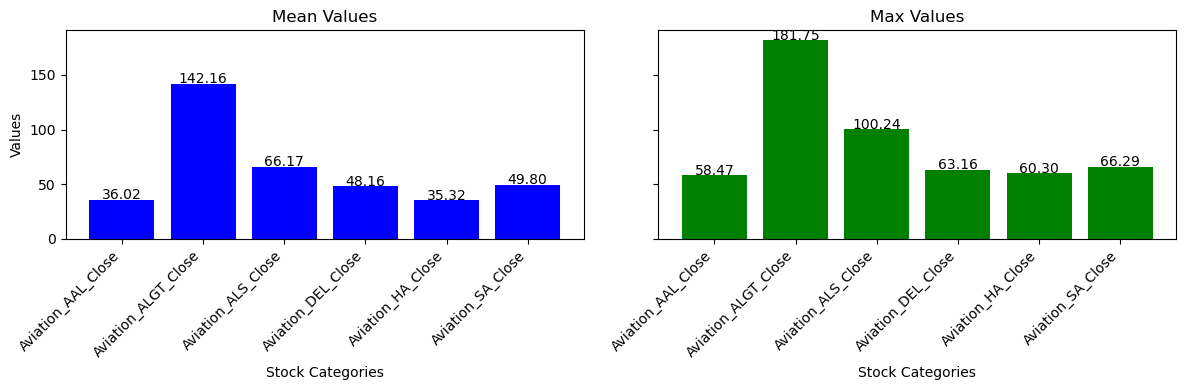

In [807]:
import matplotlib.pyplot as plt

# Define the categories for the x-axis
categories = ['Aviation_AAL_Close', 'Aviation_ALGT_Close', 'Aviation_ALS_Close', 'Aviation_DEL_Close','Aviation_HA_Close', 'Aviation_SA_Close']
# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

# Plot Dataset 1 (Mean values)
bars1 = axes[0].bar(categories, desc.loc["mean", categories], color='b')
axes[0].set_title("Mean Values")
axes[0].set_xticks(range(len(categories)))  # Set positions for labels
axes[0].set_xticklabels(categories, rotation=45, ha="right")  # Rotate for better readability
axes[0].set_xlabel("Stock Categories")

# Plot Dataset 2 (Max values)
bars2 = axes[1].bar(categories, desc.loc["max", categories], color='g')
axes[1].set_title("Max Values")
axes[1].set_xticks(range(len(categories)))
axes[1].set_xticklabels(categories, rotation=45, ha="right")
axes[1].set_xlabel("Stock Categories")

# Function to add labels on top of each bar
def add_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.2f}', ha='center', fontsize=10)

# Add labels to both subplots
add_labels(axes[0], bars1)
add_labels(axes[1], bars2)

# Formatting
axes[0].set_ylabel("Values")  # Set Y label only on the first subplot
plt.tight_layout()
plt.show()


# After looking at these two subplots, we can easily comprehend that the values of these stock vary in a great range and we cannot start our analysis to comapre them on the basis of current values. We will need to standardize the values in order to bring them on the same rate.

## Now we will look at the graphical trends of each industry

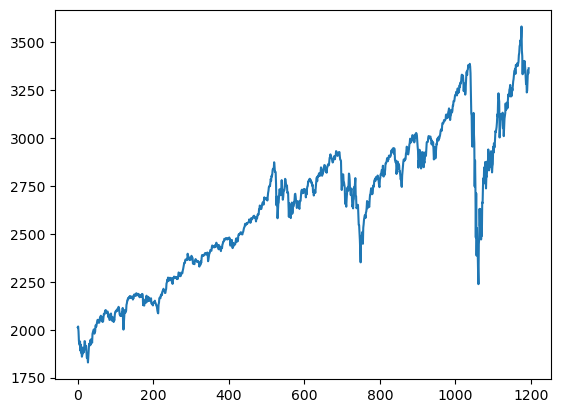

In [811]:
plt.plot(sp["S&P500_Close"],label="S&P Close")
plt.show()

In [812]:
# fin.to_excel("Finance_closes.xlsx", index= False)

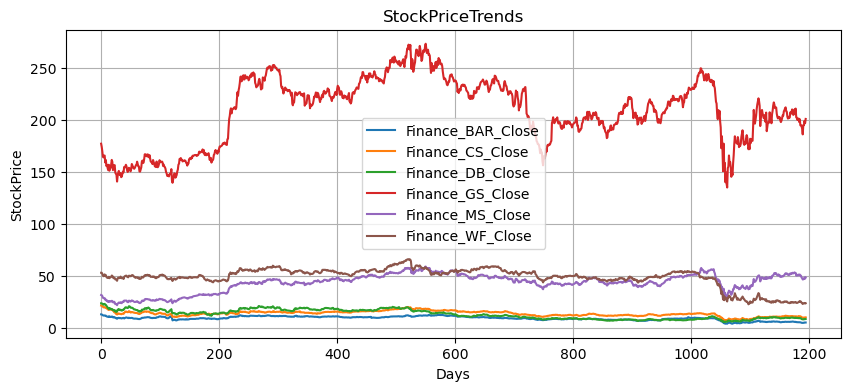

In [813]:
#Finance
import matplotlib.pyplot as plt

#Plotmultiplecolumns
plt.figure(figsize=(10,4))#Setfiguresize
plt.plot(fin["Finance_BAR_Close"],label="Finance_BAR_Close")
plt.plot(fin["Finance_CS_Close"],label="Finance_CS_Close")
plt.plot(fin["Finance_DB_Close"],label="Finance_DB_Close")
plt.plot(fin["Finance_GS_Close"],label="Finance_GS_Close")
plt.plot(fin["Finance_MS_Close"],label="Finance_MS_Close")
plt.plot(fin["Finance_WF_Close"],label="Finance_WF_Close")
# plt.plot(sp["S&P Close"],label="S&P Close")

#Formatting
plt.xlabel("Days")#Adjustbasedonyourdataset
plt.ylabel("StockPrice")
plt.title("StockPriceTrends")
plt.legend()#Showlegendfordifferentstocks
plt.grid(True)

plt.show()


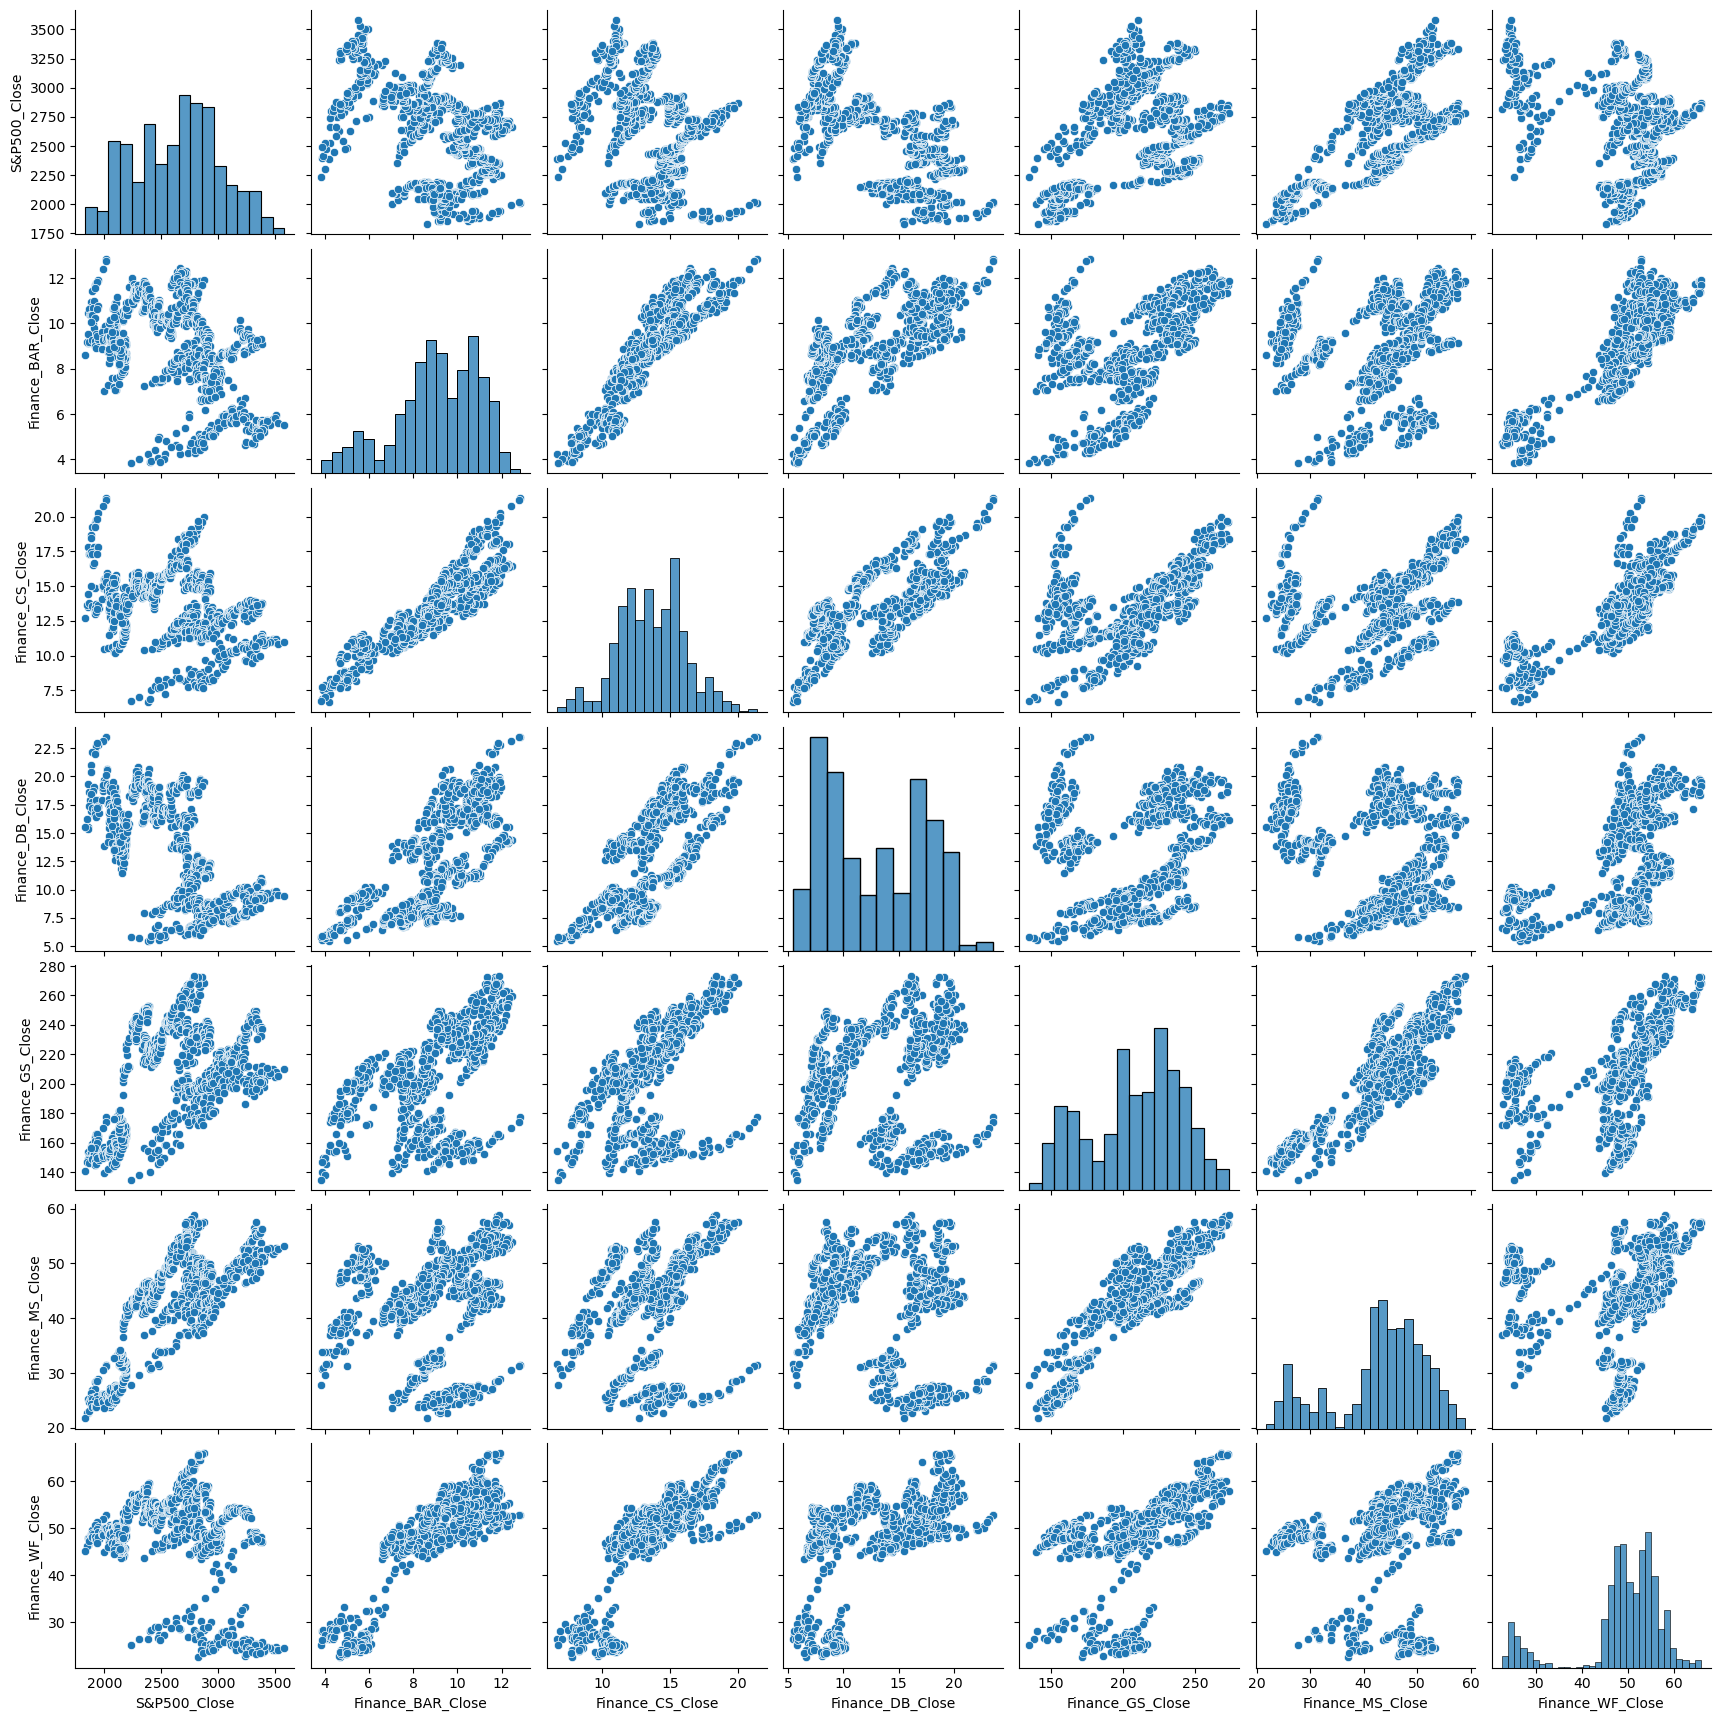

In [814]:
# Here we will check the correlation between finance industry and S&P500
Finance_Stocks = fin[["S&P500_Close","Finance_BAR_Close","Finance_CS_Close","Finance_DB_Close","Finance_GS_Close","Finance_MS_Close","Finance_WF_Close"]]

sns.pairplot(Finance_Stocks)
plt.show()

# Insights:
* S&P500 is positively co-related with Finance Sector.
* Althought market took a massive hit in 2020 due to corona pandemic Morgan Stanley and Goldman Sachs were able to recover back as well as out performed the sector but still majority of stocks have been hit.
* In the pairplot we can see that Goldman Sachs & Morgan Stanley are highly correlated when compared to others stocks.

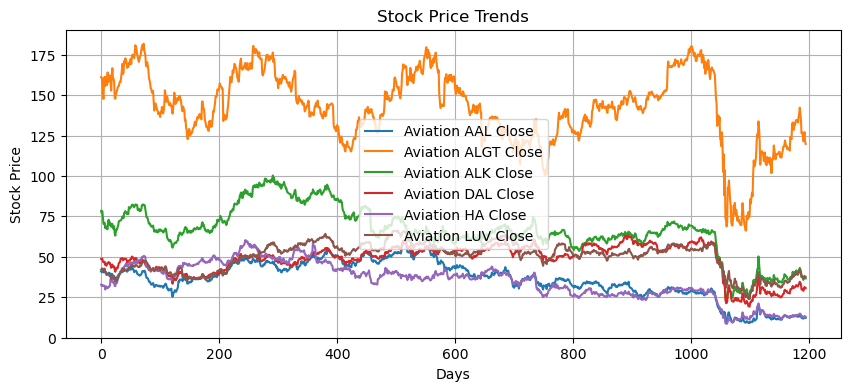

In [815]:
# Aviation
import matplotlib.pyplot as plt

# Plot multiple columns
plt.figure(figsize=(10,4))  # Set figure size
plt.plot(av["Aviation_AAL_Close"], label="Aviation AAL Close")
plt.plot(av["Aviation_ALGT_Close"], label="Aviation ALGT Close")
plt.plot(av["Aviation_ALS_Close"], label="Aviation ALK Close")
plt.plot(av["Aviation_DEL_Close"], label="Aviation DAL Close")
plt.plot(av["Aviation_HA_Close"], label="Aviation HA Close")
plt.plot(av["Aviation_SA_Close"], label="Aviation LUV Close")
# plt.plot(sp["S&P Close"],label="S&P Close")

# Formatting
plt.xlabel("Days")  # Adjust based on your dataset
plt.ylabel("Stock Price")
plt.title("Stock Price Trends")
plt.legend(loc = "center")  # Show legend for different stocks
plt.grid(True)

plt.show()


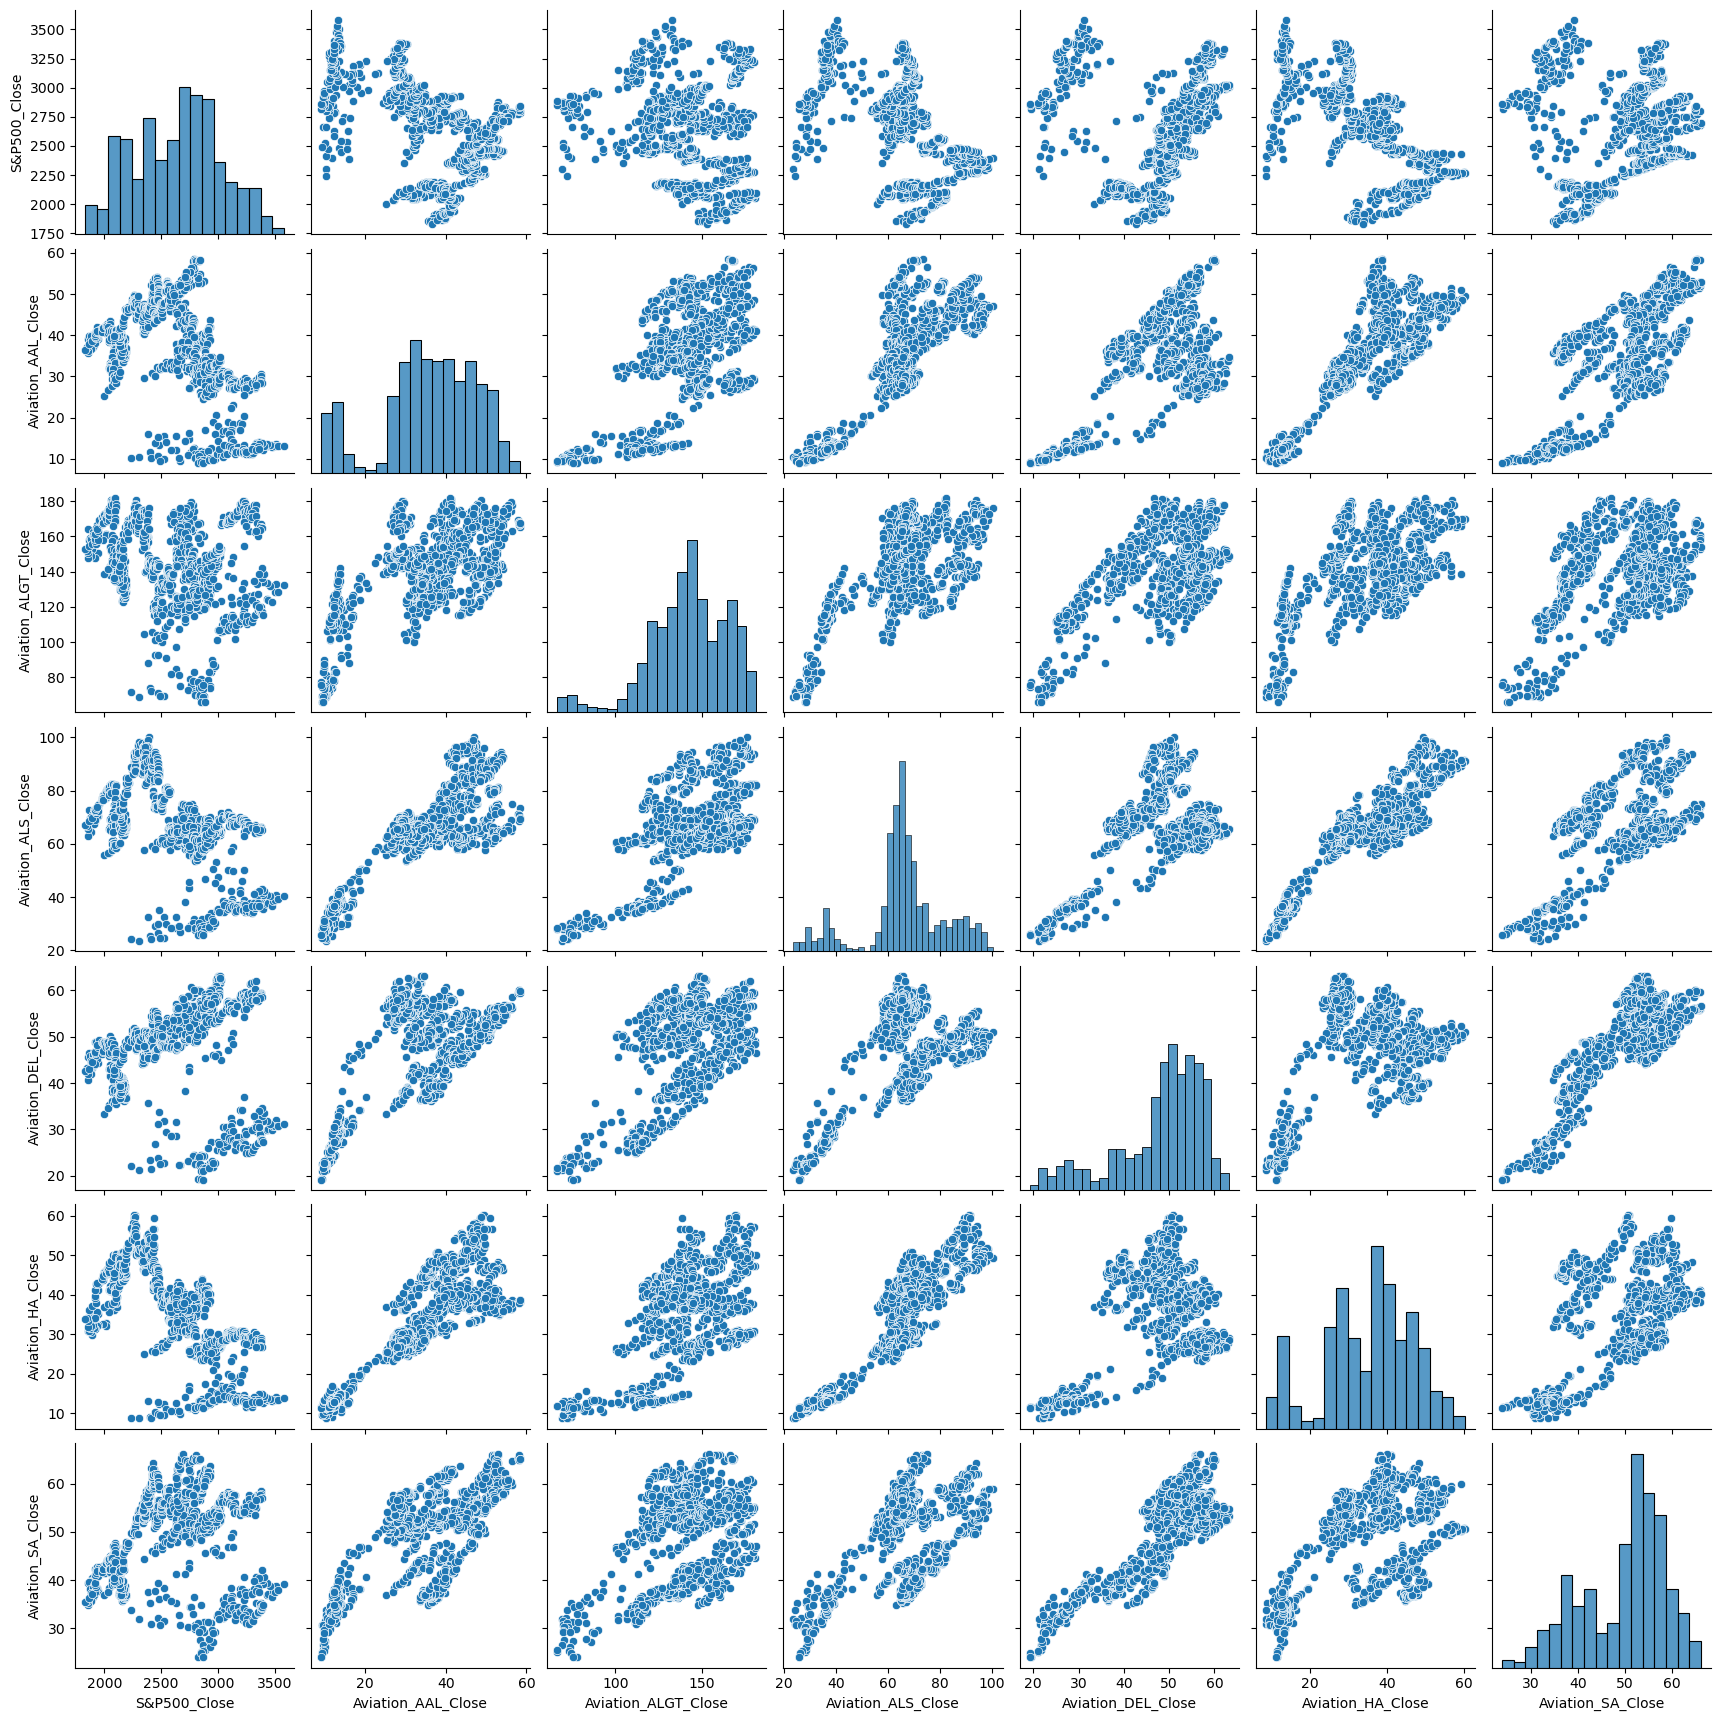

In [816]:
# Here we will check the correlation between Aviation_stocks and S&P500

Aviation_stocks = av[["S&P500_Close","Aviation_AAL_Close","Aviation_ALGT_Close","Aviation_ALS_Close","Aviation_DEL_Close","Aviation_HA_Close","Aviation_SA_Close"]]

sns.pairplot(Aviation_stocks)
plt.show()

# Insights:
* S&P500 is not co-related to Aviation Sector.
* Market took a massive hit in 2020 due to corona pandemic which resulted in a bear market.
* Even though the market recovered but the Aviation Sector underperformed the market.
* Well within the Aviation Sector only 3 stocks i.e. Allegiant Travel Company, Delta Airlines, Southwest Airlines.
* As we can see in the pairplot Allegiant Travel Company has some positive coorelation with Delta Airlines.
* Also we can see there is some positive coorelation of Delta Airlines with Southwest Airlines.

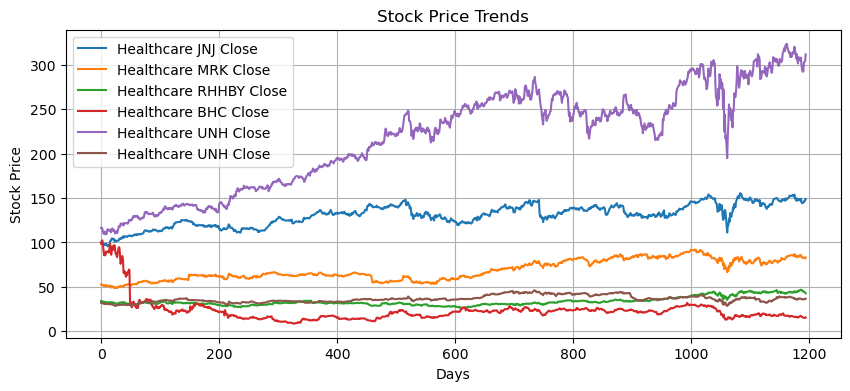

In [817]:
# Health and Pharmacy
import matplotlib.pyplot as plt

# Plot multiple columns
plt.figure(figsize=(10,4))  # Set figure size
plt.plot(hea["Health_JNJ_Close"], label="Healthcare JNJ Close")
plt.plot(hea["Health_MAC_Close"], label="Healthcare MRK Close")
plt.plot(hea["Health_RH_Close"], label="Healthcare RHHBY Close")
plt.plot(hea["Health_BH_Close"], label="Healthcare BHC Close")
plt.plot(hea["Health_UHG_Close"], label="Healthcare UNH Close")
plt.plot(hea["Health_PFE_Close"], label="Healthcare UNH Close")
# plt.plot(sp["S&P Close"],label="S&P Close")

# Formatting
plt.xlabel("Days")  # Adjust based on your dataset
plt.ylabel("Stock Price")
plt.title("Stock Price Trends")
plt.legend()  # Show legend for different stocks
plt.grid(True)

plt.show()


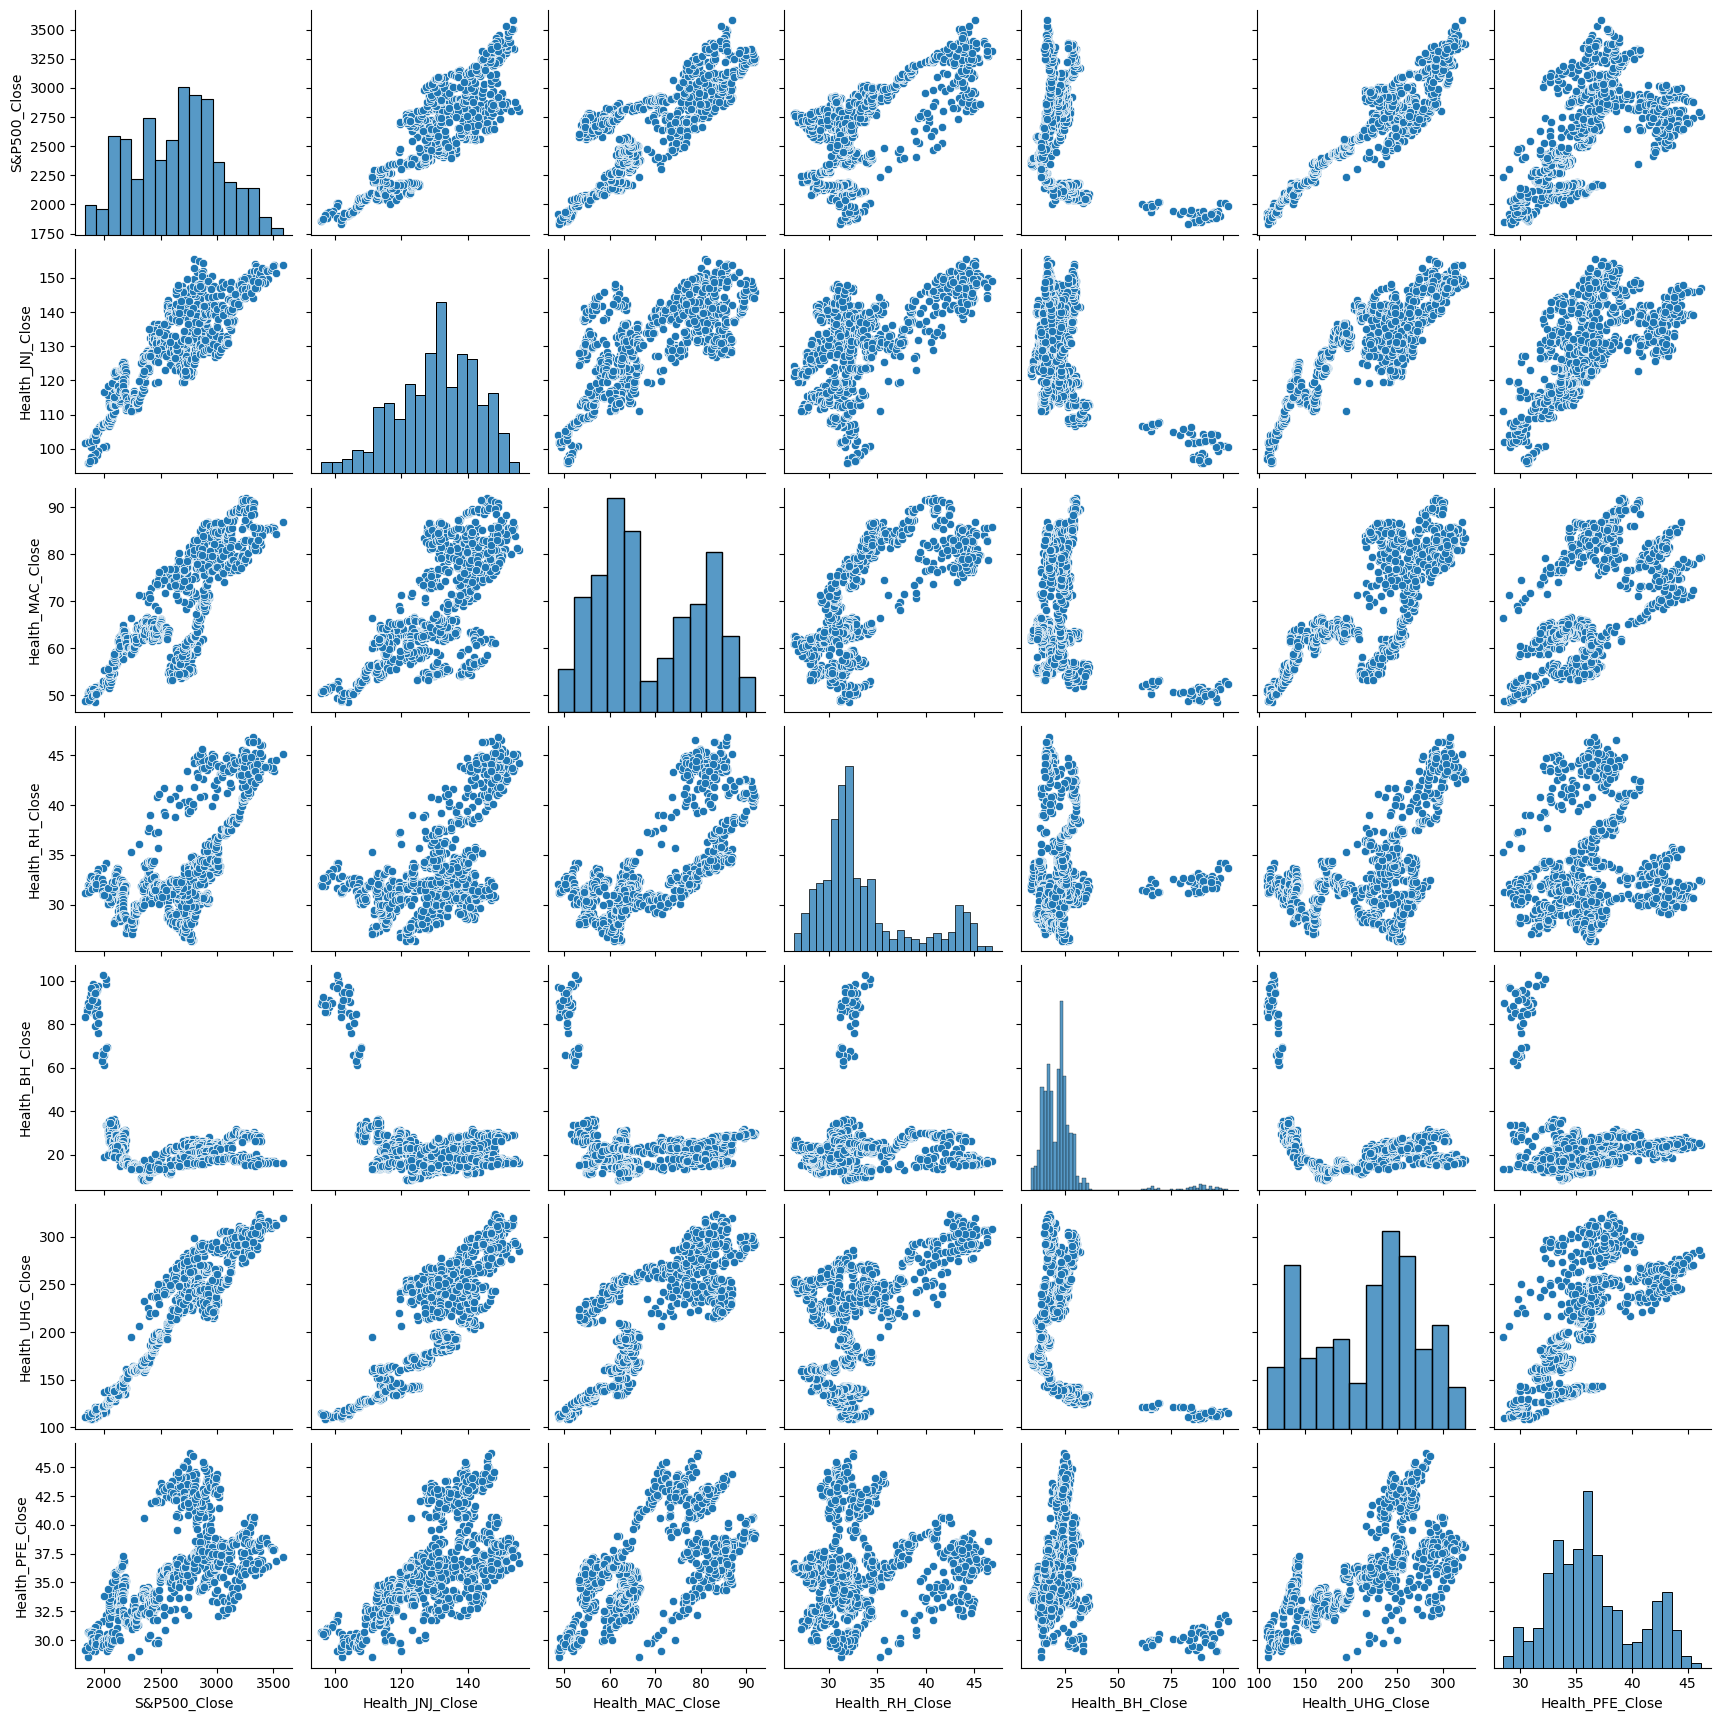

In [818]:
# Here we will check the correlation between Healthcare_stock and S&P500

Healthcare_stock = hea[["S&P500_Close","Health_JNJ_Close","Health_MAC_Close","Health_RH_Close","Health_BH_Close","Health_UHG_Close","Health_PFE_Close"]]

sns.pairplot(Healthcare_stock)
plt.show()

# Insights:
* S&P500 is positively co-related with Health and Pharma Sector(JNJ, MRK, UNH).
* During the pandemic health and pharma and technology sector showed rapid growth after the market crash in comparison to other industries.
* From past 5 years we can see that Bausch Health Companies inc has not seen any growth.
* Overall the health and pharma sector is strong compared to S&P500. 

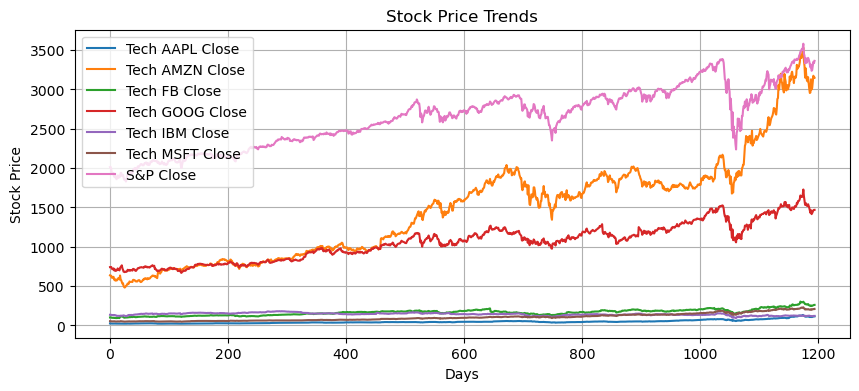

In [819]:
# Technology
import matplotlib.pyplot as plt

# Plot multiple columns
plt.figure(figsize=(10,4))  # Set figure size
plt.plot(tech["Tech_APL_Close"], label="Tech AAPL Close")
plt.plot(tech["Tech_AMZN_Close"], label="Tech AMZN Close")
plt.plot(tech["Tech_FB_Close"], label="Tech FB Close")
plt.plot(tech["Tech_GOOG_Close"], label="Tech GOOG Close")
plt.plot(tech["Tech_IBM_Close"], label="Tech IBM Close")
plt.plot(tech["Tech_MSFT_Close"], label="Tech MSFT Close")
plt.plot(sp["S&P500_Close"],label="S&P Close")


# Formatting
plt.xlabel("Days")  # Adjust based on your dataset
plt.ylabel("Stock Price")
plt.title("Stock Price Trends")
plt.legend()  # Show legend for different stocks
plt.grid(True)

plt.show()


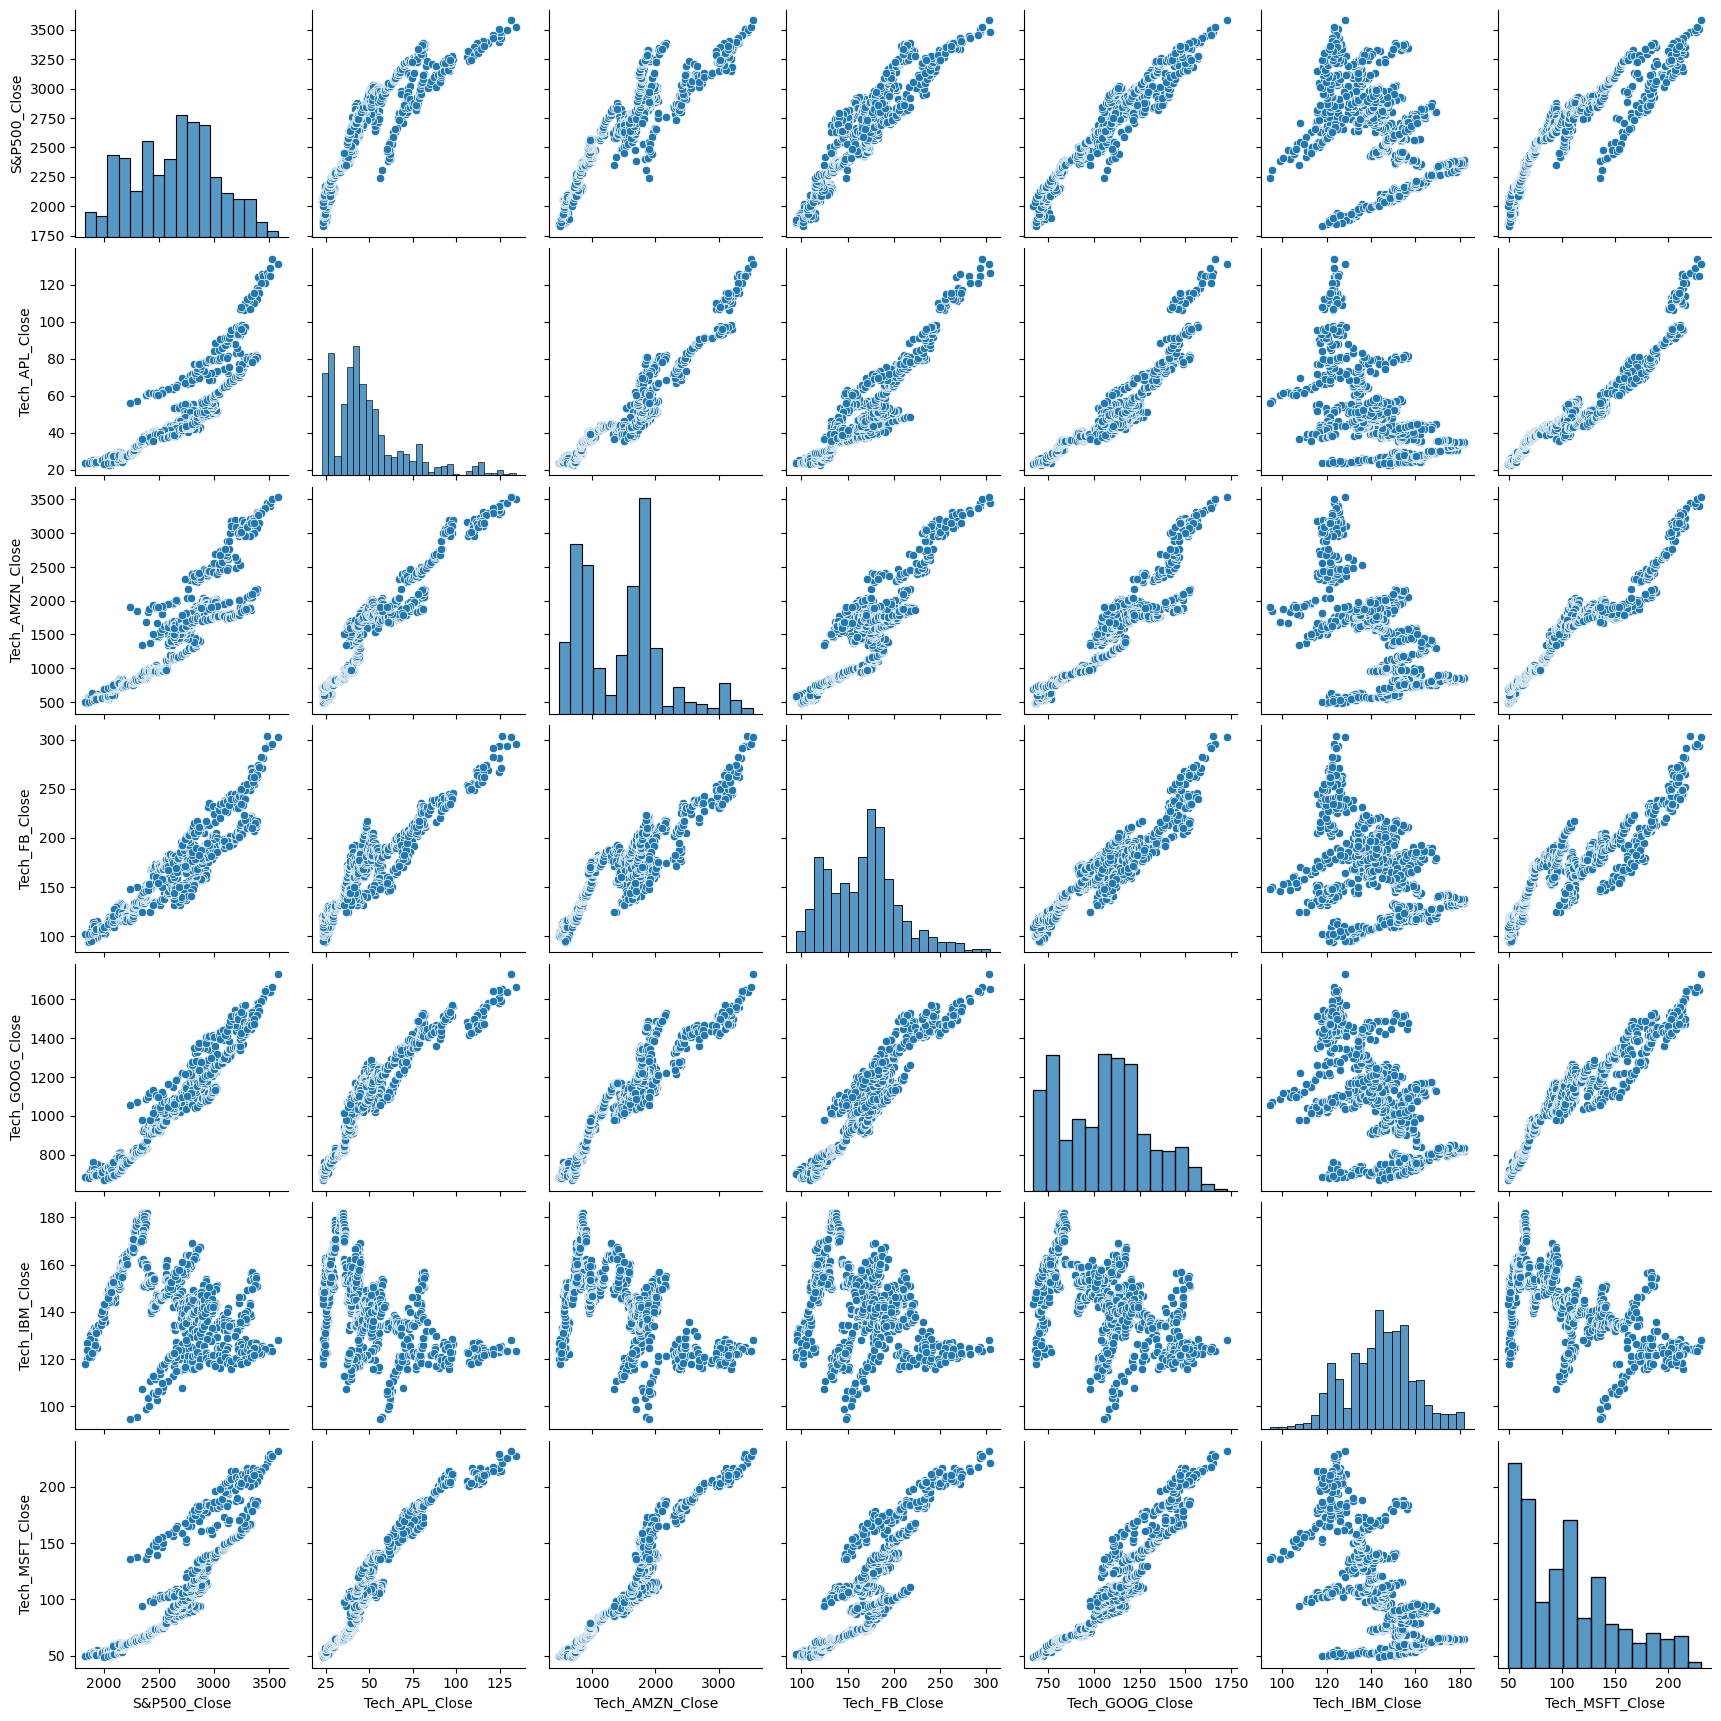

In [820]:
# Here we will check the correlation between Technology_stock and S&P500

Technology_stock = tech[["S&P500_Close","Tech_APL_Close","Tech_AMZN_Close","Tech_FB_Close","Tech_GOOG_Close","Tech_IBM_Close","Tech_MSFT_Close"]]

sns.pairplot(Technology_stock)
plt.show()

# Insights:
* S&P500 is strongly co-related with Technology Sector(AMZN, FB, MSFT, GOOG, AAPL).
* When compared to other sectors during the pandemic Tech sector was one of few sectors to bounce back sharply.
* Except for IBM all the other stocks are out performing the market.
* Also all the stocks except for IBM are strongly co-related with each other.

### 1. The First and the Second graphs show that how the prices of GS and ALGT are much higher as compared to other organisations in the same industry.
### 2. The Third and Fourth graphs show that even after the prices of all of the organisations in these two industries started almost at the same value, the variation in them increased gradually.
### 3. If we had only looked at the statistical analysis from the describe function for the Health industry, we would have gotten some wrong insights. Becuase the max value for BHC and UNH are very high at some point of time. But it is only through the visualization of the trend can we see that prices of BHC reached maximum in the past and then declined. But the prices of UNH increased gradually from the beginning and are now at it maximum value.

#

# Now we will look at the relative strength of each organisation in terms of the market by dividing the closing price of each industry by S&P.
## For that, we will create a new dataframe and store the relative price of each organisation in it.
### Through relative price, we check if a particular stock is growing or not in terms of market. A stock may be growing if looked without any outside parameters, but we also need to check if that is also growing or not in the market as a whole.

In [821]:
# Creating a new DataFrame
relative_strength = pd.DataFrame()

relative_strength["Date"] = close["Date"]

# Here we will create new columns in our DataFrame with each column representing the relative strength of each org in terms of S&P
for name in close.columns[1:]:
    relative_strength[name] = close[name] / close["S&P500_Close"]

## Visual representaion of Relative Strnegth of each industry.

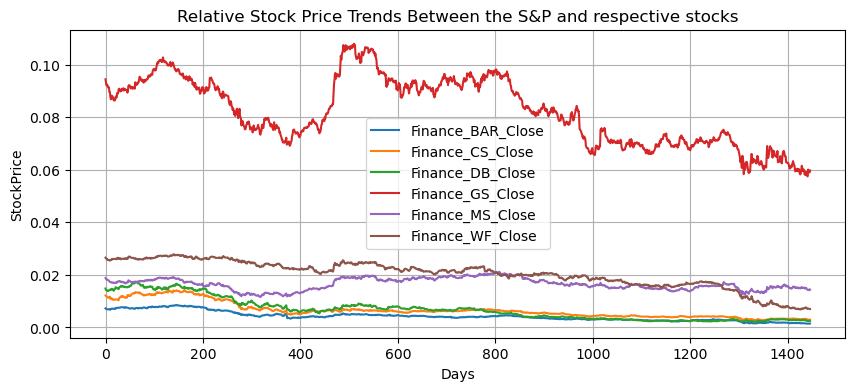

In [822]:
#Finance
import matplotlib.pyplot as plt

#Plotmultiplecolumns
plt.figure(figsize=(10,4))#Setfiguresize
plt.plot(relative_strength["Finance_BAR_Close"],label="Finance_BAR_Close")
plt.plot(relative_strength["Finance_CS_Close"],label="Finance_CS_Close")
plt.plot(relative_strength["Finance_DB_Close"],label="Finance_DB_Close")
plt.plot(relative_strength["Finance_GS_Close"],label="Finance_GS_Close")
plt.plot(relative_strength["Finance_MS_Close"],label="Finance_MS_Close")
plt.plot(relative_strength["Finance_WF_Close"],label="Finance_WF_Close")
# plt.plot(sp["S&P Close"],label="S&P Close")

#Formatting
plt.xlabel("Days")#Adjustbasedonyourdataset
plt.ylabel("StockPrice")
plt.title("Relative Stock Price Trends Between the S&P and respective stocks")
plt.legend()#Showlegendfordifferentstocks
plt.grid(True)

plt.show()


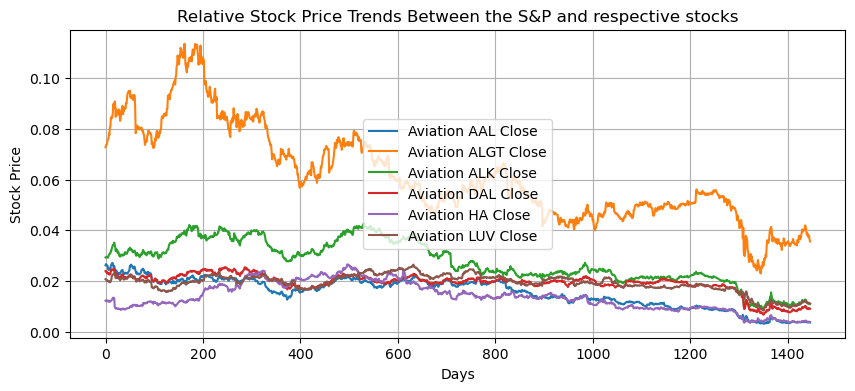

In [823]:
# Aviation
import matplotlib.pyplot as plt

# Plot multiple columns
plt.figure(figsize=(10,4))  # Set figure size
plt.plot(relative_strength["Aviation_AAL_Close"], label="Aviation AAL Close")
plt.plot(relative_strength["Aviation_ALGT_Close"], label="Aviation ALGT Close")
plt.plot(relative_strength["Aviation_ALS_Close"], label="Aviation ALK Close")
plt.plot(relative_strength["Aviation_DEL_Close"], label="Aviation DAL Close")
plt.plot(relative_strength["Aviation_HA_Close"], label="Aviation HA Close")
plt.plot(relative_strength["Aviation_SA_Close"], label="Aviation LUV Close")
# plt.plot(sp["S&P Close"],label="S&P Close")

# Formatting
plt.xlabel("Days")  # Adjust based on your dataset
plt.ylabel("Stock Price")
plt.title("Relative Stock Price Trends Between the S&P and respective stocks")
plt.legend(loc = "center")  # Show legend for different stocks
plt.grid(True)

plt.show()


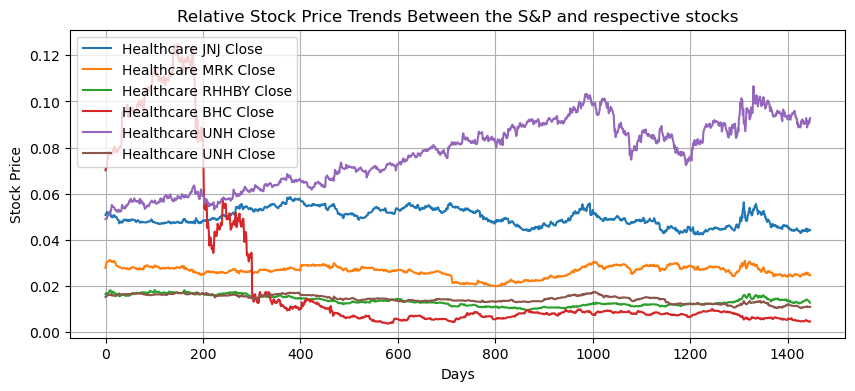

In [824]:
# Health and Pharmacy
import matplotlib.pyplot as plt

# Plot multiple columns
plt.figure(figsize=(10,4))  # Set figure size
plt.plot(relative_strength["Health_JNJ_Close"], label="Healthcare JNJ Close")
plt.plot(relative_strength["Health_MAC_Close"], label="Healthcare MRK Close")
plt.plot(relative_strength["Health_RH_Close"], label="Healthcare RHHBY Close")
plt.plot(relative_strength["Health_BH_Close"], label="Healthcare BHC Close")
plt.plot(relative_strength["Health_UHG_Close"], label="Healthcare UNH Close")
plt.plot(relative_strength["Health_PFE_Close"], label="Healthcare UNH Close")
# plt.plot(sp["S&P Close"],label="S&P Close")

# Formatting
plt.xlabel("Days")  # Adjust based on your dataset
plt.ylabel("Stock Price")
plt.title("Relative Stock Price Trends Between the S&P and respective stocks")
plt.legend()  # Show legend for different stocks
plt.grid(True)

plt.show()


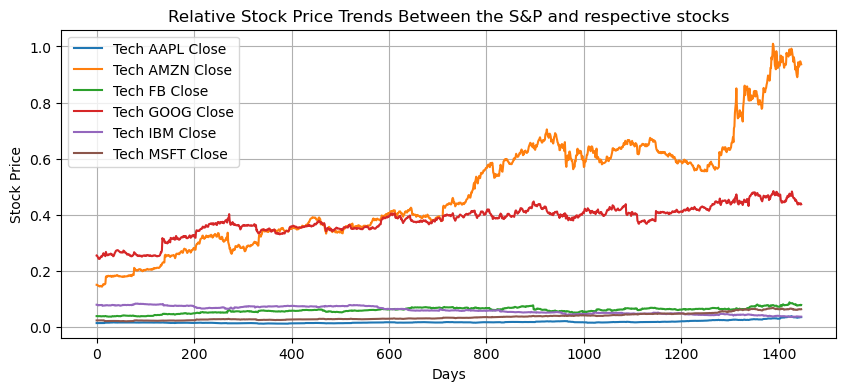

In [825]:
# Technology
import matplotlib.pyplot as plt

# Plot multiple columns
plt.figure(figsize=(10,4))  # Set figure size
plt.plot(relative_strength["Tech_APL_Close"], label="Tech AAPL Close")
plt.plot(relative_strength["Tech_AMZN_Close"], label="Tech AMZN Close")
plt.plot(relative_strength["Tech_FB_Close"], label="Tech FB Close")
plt.plot(relative_strength["Tech_GOOG_Close"], label="Tech GOOG Close")
plt.plot(relative_strength["Tech_IBM_Close"], label="Tech IBM Close")
plt.plot(relative_strength["Tech_MSFT_Close"], label="Tech MSFT Close")
#plt.plot(sp["S&P500_Close"],label="S&P Close")


# Formatting
plt.xlabel("Days")  # Adjust based on your dataset
plt.ylabel("Stock Price")
plt.title("Relative Stock Price Trends Between the S&P and respective stocks")
plt.legend()  # Show legend for different stocks
plt.grid(True)

plt.show()


## 1. Above 1st and 2nd graphs show show the GS and ALGT were shwoing  an inverse relation with the stock market in the last few yrs.
## 2. In the 3rd graph, we can see that while UNH is showing growth, BHC is showing a decrease in its stock value drastically in terms of market rate after a certian point of time.
## 3. Last or 4th graph shows how AMZN took a sudden pace in its growth after a point, there was a gradual growth of GOOG.

# Now we will analyse the Normalized Prices of each organisation through visual representaion. Here, each stock will start at 1 and then shows increasing or decreasing trend.


## Here we will measure the reatio of closing price on each day with the closing price on the first day for a particular organisation.


### For this also, we will create a new DataFrame

In [826]:
# Creating a new DataFrame
normalized_price = pd.DataFrame()

normalized_price["Date"] = close["Date"]

# Here we are adding coluns in our new dataframe to analyse the Normalized price of each stock
for column in close.columns[1:]:
    normalized_price[column] = close[column] / close[column][0]

In [827]:
# normalized_price.to_excel("normalized_price.xlsx", index = False)

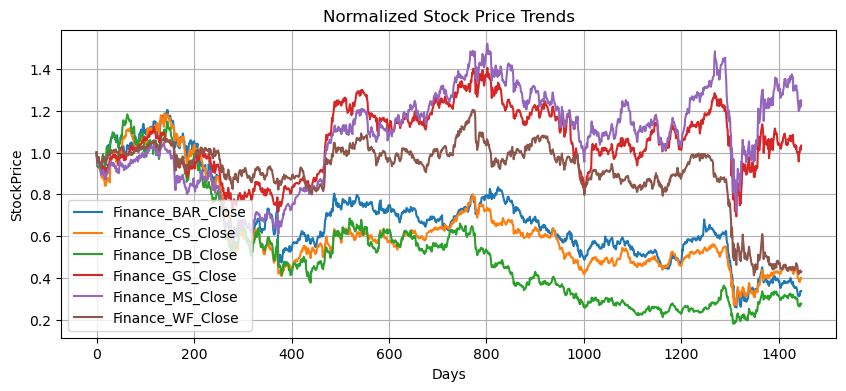

In [828]:
#Finance
import matplotlib.pyplot as plt

#Plotmultiplecolumns
plt.figure(figsize=(10,4))#Setfiguresize
plt.plot(normalized_price["Finance_BAR_Close"],label="Finance_BAR_Close")
plt.plot(normalized_price["Finance_CS_Close"],label="Finance_CS_Close")
plt.plot(normalized_price["Finance_DB_Close"],label="Finance_DB_Close")
plt.plot(normalized_price["Finance_GS_Close"],label="Finance_GS_Close")
plt.plot(normalized_price["Finance_MS_Close"],label="Finance_MS_Close")
plt.plot(normalized_price["Finance_WF_Close"],label="Finance_WF_Close")
# plt.plot(sp["S&P Close"],label="S&P Close")

#Formatting
plt.xlabel("Days")#Adjustbasedonyourdataset
plt.ylabel("StockPrice")
plt.title("Normalized Stock Price Trends")
plt.legend()#Showlegendfordifferentstocks
plt.grid(True)

plt.show()



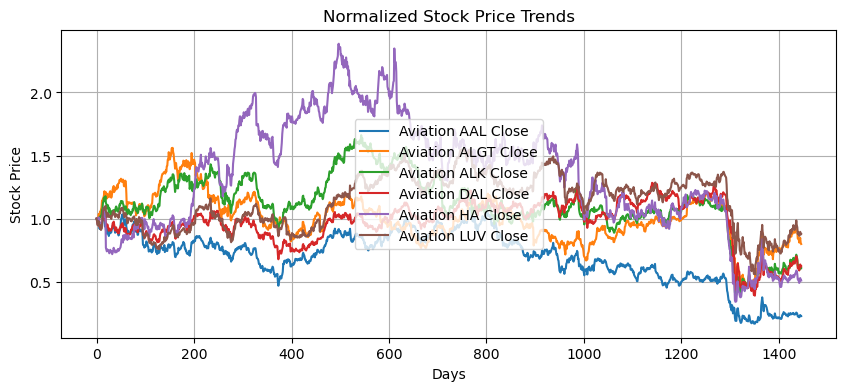

In [829]:
# Aviation
import matplotlib.pyplot as plt

# Plot multiple columns
plt.figure(figsize=(10,4))  # Set figure size
plt.plot(normalized_price["Aviation_AAL_Close"], label="Aviation AAL Close")
plt.plot(normalized_price["Aviation_ALGT_Close"], label="Aviation ALGT Close")
plt.plot(normalized_price["Aviation_ALS_Close"], label="Aviation ALK Close")
plt.plot(normalized_price["Aviation_DEL_Close"], label="Aviation DAL Close")
plt.plot(normalized_price["Aviation_HA_Close"], label="Aviation HA Close")
plt.plot(normalized_price["Aviation_SA_Close"], label="Aviation LUV Close")
# plt.plot(sp["S&P Close"],label="S&P Close")

# Formatting
plt.xlabel("Days")  # Adjust based on your dataset
plt.ylabel("Stock Price")
plt.title("Normalized Stock Price Trends")
plt.legend(loc = "center")  # Show legend for different stocks
plt.grid(True)

plt.show()



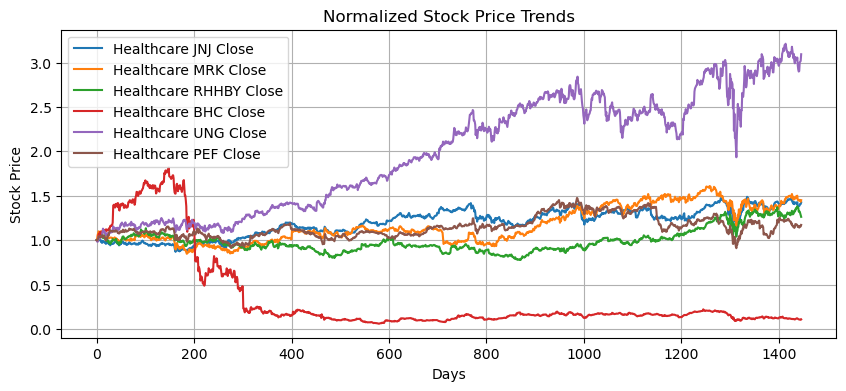

In [830]:
# Health and Pharmacy
import matplotlib.pyplot as plt

# Plot multiple columns
plt.figure(figsize=(10,4))  # Set figure size
plt.plot(normalized_price["Health_JNJ_Close"], label="Healthcare JNJ Close")
plt.plot(normalized_price["Health_MAC_Close"], label="Healthcare MRK Close")
plt.plot(normalized_price["Health_RH_Close"], label="Healthcare RHHBY Close")
plt.plot(normalized_price["Health_BH_Close"], label="Healthcare BHC Close")
plt.plot(normalized_price["Health_UHG_Close"], label="Healthcare UNG Close")
plt.plot(normalized_price["Health_PFE_Close"], label="Healthcare PEF Close")
# plt.plot(sp["S&P Close"],label="S&P Close")

# Formatting
plt.xlabel("Days")  # Adjust based on your dataset
plt.ylabel("Stock Price")
plt.title("Normalized Stock Price Trends")
plt.legend()  # Show legend for different stocks
plt.grid(True)

plt.show()


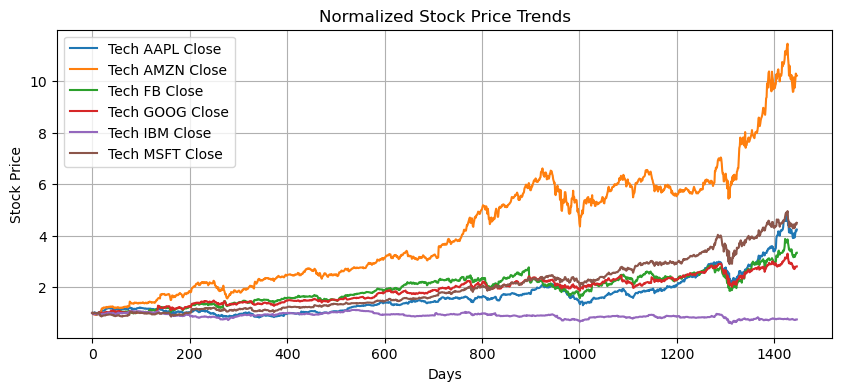

In [831]:
# Technology
import matplotlib.pyplot as plt

# Plot multiple columns
plt.figure(figsize=(10,4))  # Set figure size
plt.plot(normalized_price["Tech_APL_Close"], label="Tech AAPL Close")
plt.plot(normalized_price["Tech_AMZN_Close"], label="Tech AMZN Close")
plt.plot(normalized_price["Tech_FB_Close"], label="Tech FB Close")
plt.plot(normalized_price["Tech_GOOG_Close"], label="Tech GOOG Close")
plt.plot(normalized_price["Tech_IBM_Close"], label="Tech IBM Close")
plt.plot(normalized_price["Tech_MSFT_Close"], label="Tech MSFT Close")
#plt.plot(sp["S&P500_Close"],label="S&P Close")


# Formatting
plt.xlabel("Days")  # Adjust based on your dataset
plt.ylabel("Stock Price")
plt.title("Normalized Stock Price Trends")
plt.legend()  # Show legend for different stocks
plt.grid(True)

plt.show()


# Now we will move forward for the analysis of various metrics like daily return, mean daily return, risk and so on.

## But we start our analysis, we will need to scale our values for better explantion of the data on the same level

# Scaling our data

In [832]:
from sklearn.preprocessing import StandardScaler

# Apply Standardization
scaler = StandardScaler()



In [833]:
# Before we start analysing the date to check the trends and other parameters, we will need to standardize our data.
# In order to standardize our data, we will need to keep date column and other closing prices filleds in a different dataframe and later will concat them.
date_column = close.iloc[:, 0]
data_columns = close.iloc[:, 1:]  # Extract numerical data


In [834]:
# Here we are going to use MinMaxScaler to standardize our data.
#scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_columns)
scaled_df = pd.DataFrame(scaled_data, columns=data_columns.columns)
scaled_close = pd.concat([date_column, scaled_df], axis=1)


In [836]:
# We will define out custom function to calculate daily return for reach column as it is much more efficient approach than measuring in for each and every stock.
# Here we are using the in built function from Pandas to calculate the percentage change in the 
def Daily_Return(close):
    return close.pct_change()  # Used built-in method for efficiency
#     return scaled_close[column_name + "Daily Return"]

In [838]:
# Our DataFrame has both closing price and volume for our stock but we need to calculate daily return on the basis of closing price.
# We will create a new variable and store all the closing oprice in it for simplicity.
all_close = scaled_close.iloc[:,1::2]
all_close["Date"] = scaled_close["Date"]
#all_close.to_excel("all_close.xlsx", index=False)

In [839]:
# Now we will calculate daily return on the basis of the closing prices stored in the all_close variable
Daily_return = pd.DataFrame()
Daily_return["Date"] = all_close["Date"]
for i in all_close.columns[0:-1]:
    Daily_return[i + " Daily Return"] = Daily_Return(all_close[i])
Daily_return.head()

Date  Finance_BAR_Close Daily Return  Finance_CS_Close Daily Return  \
0 2015-01-02                             NaN                            NaN   
1 2015-01-05                       -0.128459                      -0.080661   
2 2015-01-06                       -0.074905                      -0.050303   
3 2015-01-07                        0.010448                      -0.002463   
4 2015-01-08                        0.062038                      -0.022227   

   Finance_DB_Close Daily Return  Finance_GS_Close Daily Return  \
0                            NaN                            NaN   
1                      -0.113507                       0.529509   
2                      -0.035696                       0.217299   
3                       0.024142                      -0.128845   
4                       0.004714                      -0.160809   

   Finance_MS_Close Daily Return  Finance_WF_Close Daily Return  \
0                            NaN                            NaN   
1                       0.380306                      -0.306390   
2                       0.245922                      -0.326882   
3                      -0.095036                       0.135625   
4                      -0.111075                       0.446888   

   Aviation_AAL_Close Daily Return  Aviation_ALGT_Close Daily Return  \
0                              NaN                               NaN   
1                        -0.001840                          9.998411   
2                        -0.051619                          0.583888   
3                        -0.001944                         -0.998589   
4                         0.042200                      -1755.865516   

   Aviation_ALS_Close Daily Return  ...  Health_PFE_Close Daily Return  \
0                              NaN  ...                            NaN   
1                         0.127681  ...                       0.036569   
2                         0.092160  ...                      -0.053956   
3                        -0.108492  ...                      -0.094325   
4                        -0.139274  ...                      -0.157435   

   Health_RH_Close Daily Return  Health_UHG_Close Daily Return  \
0                           NaN                            NaN   
1                      0.573027                       0.016636   
2                     -0.394634                       0.001972   
3                      0.451321                      -0.009937   
4                      1.002012                      -0.047401   

   Tech_APL_Close Daily Return  Tech_AMZN_Close Daily Return  \
0                          NaN                           NaN   
1                     0.043767                      0.006404   
2                    -0.000136                      0.006936   
3                    -0.020288                     -0.003125   
4                    -0.057537                     -0.002043   

   Tech_GOOG_Close Daily Return  Tech_IBM_Close Daily Return  \
0                           NaN                          NaN   
1                      0.023963                    -0.157118   
2                      0.025477                    -0.251465   
3                      0.001794                    -0.099611   
4                     -0.003290                     0.365516   

   Tech_MSFT_Close Daily Return  Tech_FB_Close Daily Return  \
0                           NaN                         NaN   
1                      0.008966                    0.016840   
2                      0.014053                    0.013670   
3                     -0.011821                    0.000000   
4                     -0.028049                   -0.026322   

   S&P500_Close Daily Return  
0                        NaN  
1                   0.078456  
2                   0.034750  
3                  -0.043525  
4                  -0.070808  

[5 rows x 26 columns]

In [840]:
# We will look at the description of the daily return as that will give us mean and standard deviation for further analysis.
desc_daily = Daily_return.describe()


In [841]:
desc_daily

Date  Finance_BAR_Close Daily Return  \
count                           1447                     1446.000000   
mean   2017-11-16 04:04:48.597097472                       -0.259775   
min              2015-01-02 00:00:00                     -347.562703   
25%              2016-06-09 12:00:00                       -0.061761   
50%              2017-11-14 00:00:00                        0.000000   
75%              2019-04-25 12:00:00                        0.055913   
max              2020-09-30 00:00:00                       70.931164   
std                              NaN                        9.872382   

       Finance_CS_Close Daily Return  Finance_DB_Close Daily Return  \
count                    1446.000000                    1446.000000   
mean                        0.105630                      -0.078851   
min                       -80.388621                     -67.507633   
25%                        -0.057116                      -0.043117   
50%                        -0.003231                      -0.001340   
75%                         0.048674                       0.031283   
max                       192.932690                      20.422589   
std                         5.984883                       2.194816   

       Finance_GS_Close Daily Return  Finance_MS_Close Daily Return  \
count                    1446.000000                    1446.000000   
mean                       -0.081044                       0.069645   
min                       -44.231047                     -33.504479   
25%                        -0.091898                      -0.074187   
50%                        -0.008286                      -0.001715   
75%                         0.078843                       0.076609   
max                        55.729047                      84.035535   
std                         2.661904                       2.888470   

       Finance_WF_Close Daily Return  Aviation_AAL_Close Daily Return  \
count                    1446.000000                      1446.000000   
mean                       -0.062573                        -0.002588   
min                       -43.682249                       -12.614274   
25%                        -0.097208                        -0.069357   
50%                        -0.003715                         0.000630   
75%                         0.089857                         0.073465   
max                        19.421836                        12.023208   
std                         1.756618                         0.843071   

       Aviation_ALGT_Close Daily Return  Aviation_ALS_Close Daily Return  ...  \
count                       1446.000000                      1446.000000  ...   
mean                          -1.178938                         0.079415  ...   
min                        -1755.865516                       -46.966557  ...   
25%                           -0.104142                        -0.113717  ...   
50%                           -0.000718                        -0.005898  ...   
75%                            0.099597                         0.096996  ...   
max                           80.246559                        66.211091  ...   
std                           46.252214                         3.406382  ...   

       Health_PFE_Close Daily Return  Health_RH_Close Daily Return  \
count                    1446.000000                   1446.000000   
mean                        0.172800                     -0.458223   
min                       -11.704131                   -665.030066   
25%                        -0.100337                     -0.093815   
50%                         0.000000                      0.000000   
75%                         0.089653                      0.080713   
max                       169.329656                     14.826401   
std                         4.957547                     17.537436   

       Health_UHG_Close Daily Return  Tech_APL_Close Daily Return  \
count          

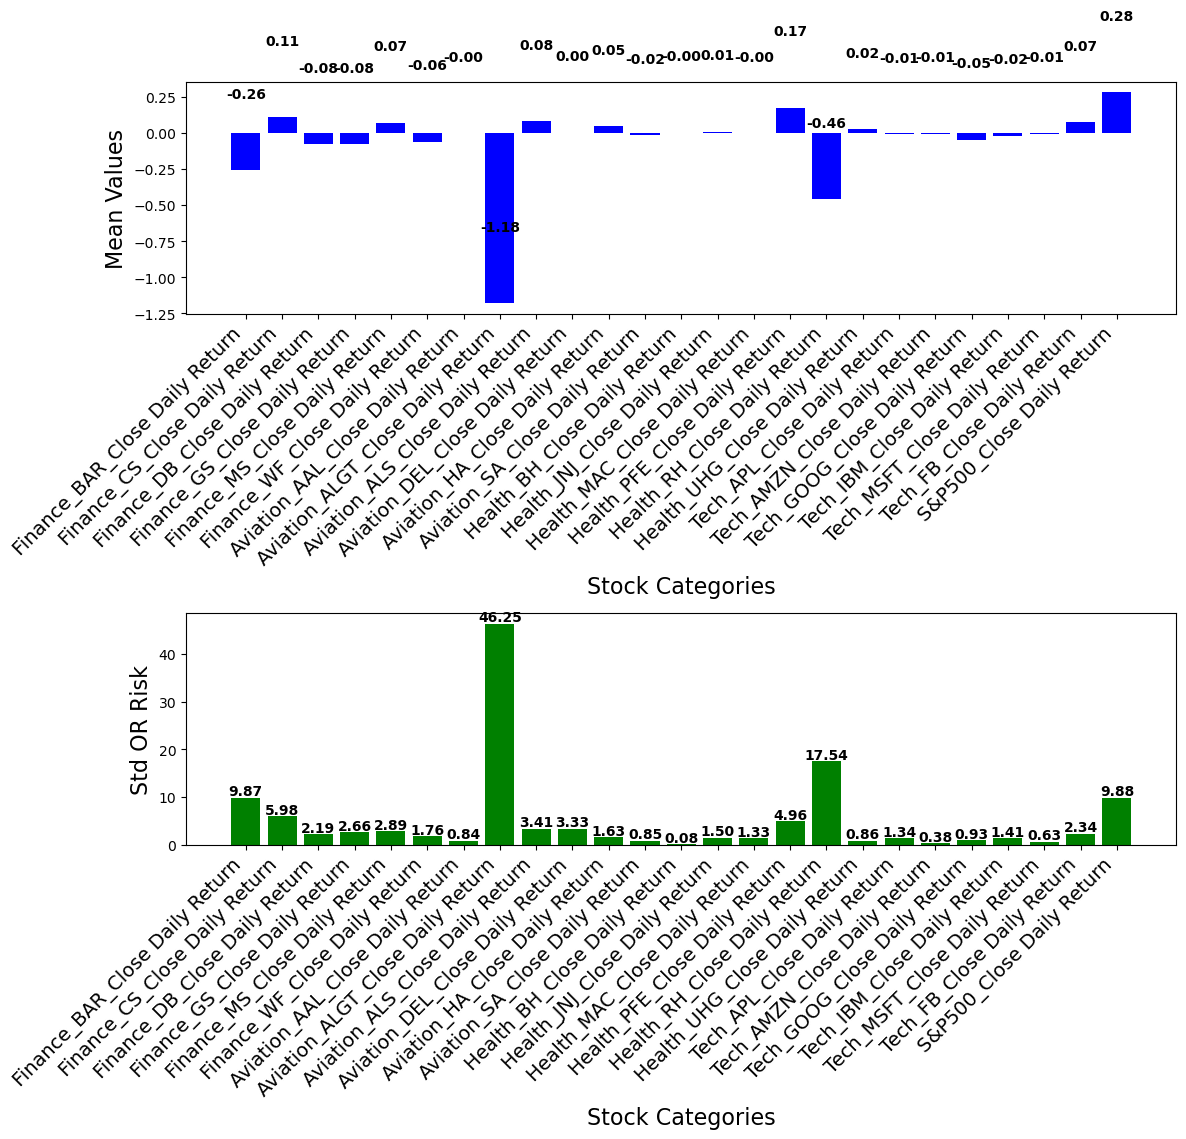

In [842]:
# Define the categories for the x-axis
categories = Daily_return.columns[1:]

# Creating subplots (stacked vertically)
fig, axes = plt.subplots(2, 1, figsize=(12, 12))  # Changed (1,2) to (2,1)

# Plot Dataset 1 (Mean values)
bars1 = axes[0].bar(categories, desc_daily.loc["mean", categories], color='b')
#axes[0].set_title("Mean Values", fontsize=18)  # Increase title font size
axes[0].set_xticks(range(len(categories)))
axes[0].set_xticklabels(categories, rotation=45, ha="right", fontsize=14)  # Increase X-axis tick labels
axes[0].set_xlabel("Stock Categories", fontsize=16)  # Increase X-label font size
axes[0].set_ylabel("Mean Values", fontsize=16)  # Increase Y-label font size

# Plot Dataset 2 (Max values)
bars2 = axes[1].bar(categories, desc_daily.loc["std", categories], color='g')
#axes[1].set_title("Max Values", fontsize=18)
axes[1].set_xticks(range(len(categories)))
axes[1].set_xticklabels(categories, rotation=45, ha="right", fontsize=14)
axes[1].set_xlabel("Stock Categories", fontsize=16)
axes[1].set_ylabel("Std OR Risk", fontsize=16)

# Function to add labels on top of each bar
def add_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.2f}', 
                ha='center', fontsize=10, fontweight='bold')  # Increase value labels font size

# Add labels to both subplots
add_labels(axes[0], bars1)
add_labels(axes[1], bars2)

# Formatting
plt.tight_layout()
plt.show()


# Now we will analyse Annualized return on the basis of Mean Daily Return

In [843]:
close.head()

Date  Finance_BAR_Close  BAR_Volume  Finance_CS_Close  CS_Volume  \
0 2015-01-02              14.92   1719600.0         24.990000  1330900.0   
1 2015-01-05              14.31   3498900.0         24.240000  1312000.0   
2 2015-01-06              14.00   2266400.0         23.809999  1949100.0   
3 2015-01-07              14.04   1897000.0         23.790001   963100.0   
4 2015-01-08              14.28   2140700.0         23.610001  1859100.0   

   Finance_DB_Close  DB_Volume  Finance_GS_Close  GS_Volume  Finance_MS_Close  \
0         30.469999  2273200.0        194.410004  1877700.0         38.709999   
1         28.820000  3302800.0        188.339996  3413200.0         37.500000   
2         28.360001  2785200.0        184.529999  3429200.0         36.419998   
3         28.660000  2689400.0        187.279999  1896800.0         36.939999   
4         28.719999  2130100.0        190.270004  1962500.0         37.490002   

   ...  Tech_GOOG_Close  GOOG_Volume  Tech_IBM_Close  IBM_Volume  \
0  ...       523.373108    1447500.0      162.059998   5525500.0   
1  ...       512.463013    2059800.0      159.509995   4880400.0   
2  ...       500.585632    2899900.0      156.070007   6146700.0   
3  ...       499.727997    2065000.0      155.050003   4701800.0   
4  ...       501.303680    3353500.0      158.419998   4236800.0   

   Tech_MSFT_Close  MSFT_Volume  Tech_FB_Close   FB_Volume  S&P500_Close  \
0        46.759998   27913900.0      78.449997  18177500.0   2058.199951   
1        46.330002   39673900.0      77.190002  26452200.0   2020.579956   
2        45.650002   36447900.0      76.150002  27399300.0   2002.609985   
3        46.230000   29114100.0      76.150002  22045300.0   2025.900024   
4        47.590000   29645200.0      78.180000  23961000.0   2062.139893   

   SNP500_Volume  
0     2708700000  
1     3799120000  
2     4460110000  
3     3805480000  
4     3934010000  

[5 rows x 51 columns]

In [846]:
# For that, we will create a new DataFrame as we need to measure Annualized return for each Company.

# Here we will get all the mean daily return values for each compnay 

# First we will need to bring out the name of each company.
com = []
coms = []
for i in close.columns[1:]:
    com.append(i.split("_"))
for j in com[0::2]:
    coms.append(j[0:2])
names = []
for name in coms:
    names.append(",".join(name))


# Cration of a new DataFrame with first column as the name of the companies and industry
Annualized_return = pd.DataFrame({"Company":names})

# Storing all of the mean values in a list
Annualized_return_val = list(desc_daily.loc["mean"][1:]*252)

# Adding a new column in our DatFrame as Annualized return for each compnay
Annualized_return["Annualized Return"] = Annualized_return_val



Annualized_return.head()

Company  Annualized Return
0  Finance,BAR         -65.463279
1   Finance,CS          26.618662
2   Finance,DB         -19.870332
3   Finance,GS         -20.423017
4   Finance,MS          17.550566

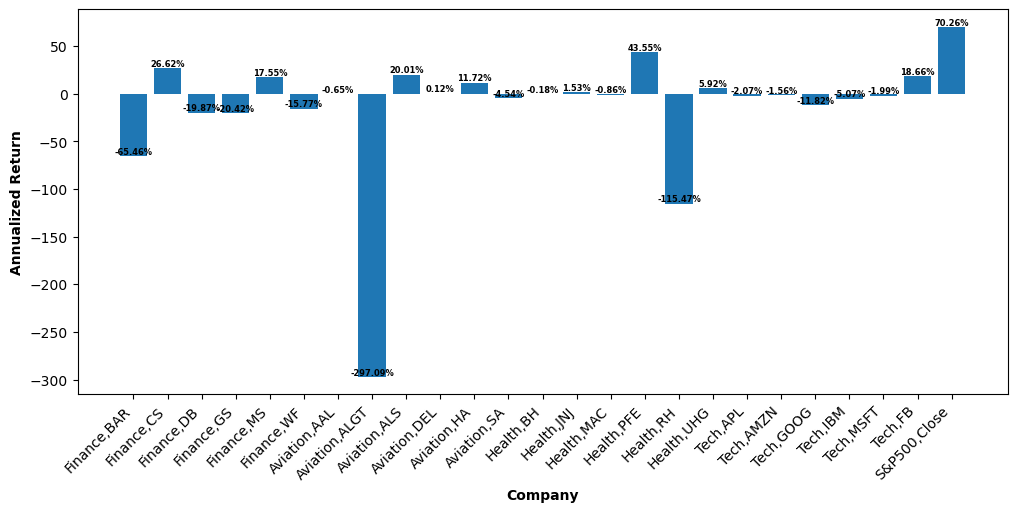

In [847]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))  # Increase figure size
bars = plt.bar(Annualized_return["Company"], Annualized_return["Annualized Return"])

# Increase font size for X and Y labels
plt.xlabel("Company", fontsize=10, fontweight="bold")  
plt.ylabel("Annualized Return", fontsize=10, fontweight="bold")  

# Increase font size for X-axis tick labels (company names)
plt.xticks(fontsize=10, rotation=45, ha="right")  
plt.yticks(fontsize=10)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        height,  # Y position (top of the bar)
        f"{height:.2f}%",  # Label text (formatted to 2 decimal places)
        ha="center",  # Center align text
        va="bottom",  # Position text just above the bar
        fontsize=6, 
        fontweight="bold",
        color="black"
    )

plt.show()


# Now we will calculate Annualized Risk for each Company.

In [848]:
desc_daily

Date  Finance_BAR_Close Daily Return  \
count                           1447                     1446.000000   
mean   2017-11-16 04:04:48.597097472                       -0.259775   
min              2015-01-02 00:00:00                     -347.562703   
25%              2016-06-09 12:00:00                       -0.061761   
50%              2017-11-14 00:00:00                        0.000000   
75%              2019-04-25 12:00:00                        0.055913   
max              2020-09-30 00:00:00                       70.931164   
std                              NaN                        9.872382   

       Finance_CS_Close Daily Return  Finance_DB_Close Daily Return  \
count                    1446.000000                    1446.000000   
mean                        0.105630                      -0.078851   
min                       -80.388621                     -67.507633   
25%                        -0.057116                      -0.043117   
50%                        -0.003231                      -0.001340   
75%                         0.048674                       0.031283   
max                       192.932690                      20.422589   
std                         5.984883                       2.194816   

       Finance_GS_Close Daily Return  Finance_MS_Close Daily Return  \
count                    1446.000000                    1446.000000   
mean                       -0.081044                       0.069645   
min                       -44.231047                     -33.504479   
25%                        -0.091898                      -0.074187   
50%                        -0.008286                      -0.001715   
75%                         0.078843                       0.076609   
max                        55.729047                      84.035535   
std                         2.661904                       2.888470   

       Finance_WF_Close Daily Return  Aviation_AAL_Close Daily Return  \
count                    1446.000000                      1446.000000   
mean                       -0.062573                        -0.002588   
min                       -43.682249                       -12.614274   
25%                        -0.097208                        -0.069357   
50%                        -0.003715                         0.000630   
75%                         0.089857                         0.073465   
max                        19.421836                        12.023208   
std                         1.756618                         0.843071   

       Aviation_ALGT_Close Daily Return  Aviation_ALS_Close Daily Return  ...  \
count                       1446.000000                      1446.000000  ...   
mean                          -1.178938                         0.079415  ...   
min                        -1755.865516                       -46.966557  ...   
25%                           -0.104142                        -0.113717  ...   
50%                           -0.000718                        -0.005898  ...   
75%                            0.099597                         0.096996  ...   
max                           80.246559                        66.211091  ...   
std                           46.252214                         3.406382  ...   

       Health_PFE_Close Daily Return  Health_RH_Close Daily Return  \
count                    1446.000000                   1446.000000   
mean                        0.172800                     -0.458223   
min                       -11.704131                   -665.030066   
25%                        -0.100337                     -0.093815   
50%                         0.000000                      0.000000   
75%                         0.089653                      0.080713   
max                       169.329656                     14.826401   
std                         4.957547                     17.537436   

       Health_UHG_Close Daily Return  Tech_APL_Close Daily Return  \
count          

In [849]:
# For that, we will create a new DataFrame as we need to measure Annualized Risk for each Company.

# Here we will get all the mean daily return risk values for each compnay 
import numpy as np

# Cration of a new DataFrame
Annualized_risk = pd.DataFrame({"Company":names})

# Storing all of the daily return risk values in a list
Annualized_risk_val = list(desc_daily.loc["std"][1:]*np.sqrt(252))

# Adding a new column in our DatFrame as Annualized risk for each compnay
Annualized_risk["Annualized risk"] = Annualized_risk_val


Annualized_risk.head()



Company  Annualized risk
0  Finance,BAR       156.719200
1   Finance,CS        95.007064
2   Finance,DB        34.841622
3   Finance,GS        42.256424
4   Finance,MS        45.853037

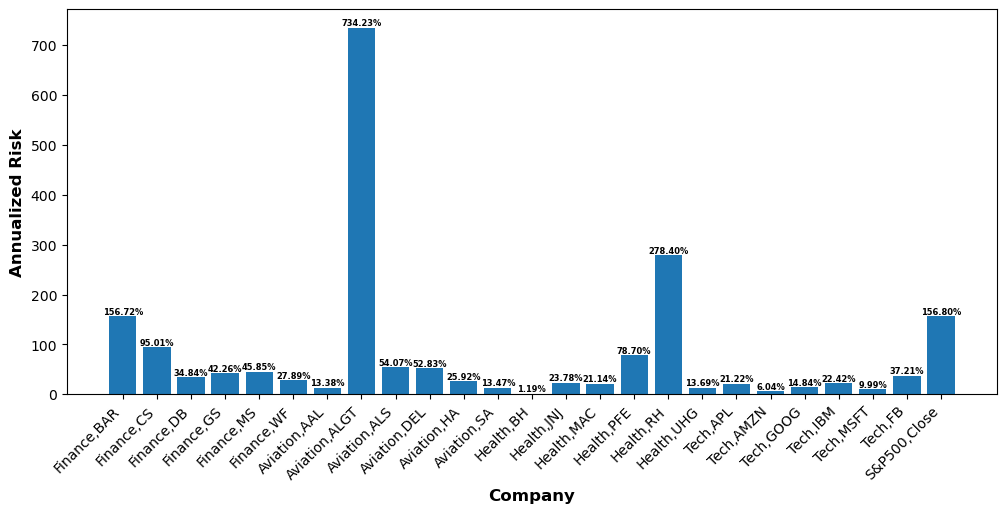

In [850]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))  # Increase figure size
bars = plt.bar(Annualized_risk["Company"], Annualized_risk["Annualized risk"])

# Increase font size for X and Y labels
plt.xlabel("Company", fontsize=12, fontweight="bold")  
plt.ylabel("Annualized Risk", fontsize=12, fontweight="bold")  

# Increase font size for X-axis tick labels (company names)
plt.xticks(fontsize=10, rotation=45, ha="right")  
plt.yticks(fontsize=10)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of the bar)
        height,  # Y position (top of the bar)
        f"{height:.2f}%",  # Format values to 2 decimal places
        ha="center",  # Center align text
        va="bottom",  # Position text just above the bar
        fontsize=6,
        fontweight="bold",
        color="black"
    )

plt.show()


# Cumulative Return

In [853]:
all_close.iloc[0:]

Finance_BAR_Close  Finance_CS_Close  Finance_DB_Close  Finance_GS_Close  \
0              1.566503          1.822273          1.847706         -0.381713   
1              1.365271          1.675286          1.637979         -0.583833   
2              1.263006          1.591013          1.579510         -0.710699   
3              1.276202          1.587094          1.617642         -0.619129   
4              1.355375          1.551817          1.625268         -0.519567   
...                 ...               ...               ...               ...   
1442          -1.788458         -1.189980         -0.994411         -0.358404   
1443          -1.804953         -1.217418         -1.008393         -0.363732   
1444          -1.709285         -1.135105         -0.953737         -0.226543   
1445          -1.719182         -1.148824         -0.974074         -0.302463   
1446          -1.702687         -1.121386         -0.957550         -0.163276   

      Finance_MS_Close  Finance_WF_Close  Aviation_AAL_Close  \
0            -0.381105          0.556134            1.442722   
1            -0.526041          0.385740            1.440067   
2            -0.655406          0.259649            1.365732   
3            -0.593119          0.294863            1.363077   
4            -0.527239          0.426635            1.420598   
...                ...               ...                 ...   
1442          0.565175         -3.008504           -2.286431   
1443          0.616682         -2.972153           -2.240414   
1444          0.777190         -2.951706           -2.198821   
1445          0.640638         -3.015319           -2.243953   
1446          0.773596         -2.986920           -2.240414   

      Aviation_ALGT_Close  Aviation_ALS_Close  Aviation_DEL_Close  ...  \
0               -0.004387           -0.464104            0.155948  ...   
1               -0.048247           -0.523361            0.063278  ...   
2               -0.076418           -0.571594           -0.065556  ...   
3               -0.000108           -0.509581           -0.093810  ...   
4                0.189241           -0.438610            0.044065  ...   
...                   ...                 ...                 ...  ...   
1442            -1.015677           -2.161207           -2.123512  ...   
1443            -0.935087           -2.092303           -2.036493  ...   
1444            -0.815630           -2.034424           -1.860194  ...   
1445            -1.030297           -2.094370           -1.942692  ...   
1446            -1.076297           -2.097126           -1.946083  ...   

      Health_RH_Close  Health_UHG_Close  Tech_APL_Close  Tech_AMZN_Close  \
0            0.047533         -1.552301       -0.863949        -1.394830   
1            0.074771         -1.578125       -0.901761        -1.403763   
2            0.045264         -1.581237       -0.901638        -1.413499   
3            0.065692         -1.565524       -0.883346        -1.409082   
4            0.131517         -1.491317       -0.832521        -1.406204   
...               ...               ...             ...              ...   
1442         2.496688          1.432800        3.108161         2.431093   
1443         2.523925          1.585882        3.307534         2.537406   
1444         2.362767          1.597239        3.439140         2.648772   
1445         2.194799          1.611551        3.396417         2.607609   
1446         2.067688          1.730096        3.480880         2.613042   

      Tech_GOOG_Close  Tech_IBM_Close  Tech_MSFT_Close  Tech_FB_Close  \
0           -1.642186        1.046398        -1.023720      -1.626651   
1           -1.681537        0.881990        -1.032899      -1.654044   
2           -1.724377        0.660201        -1.047415      -1.676654   
3           -1.727470        0.594437        -1.035034      -1.676654   
4           -1.721787        0.811714        -1.006002      -1.632521   
...               ...   

In [854]:
# For that, we will create a new DataFrame as we need to measure Cumulative return for each Company.

# Cration of a new DataFramea
Cumulative_return = pd.DataFrame({"Company":names})

def Cumulative_Return(close):
    return (close.iloc[-1] - close.iloc[0]) / close.iloc[0]




Cumulative_return_val = []
for i in all_close.columns[0:-1]:
    Cumulative_return_val.append(Cumulative_Return(all_close[i]))



    
# # Adding a new column in our DatFrame as Cumulative return for each compnay

# Cumulative_return["Cumulative_return"] = Cumulative_return_val
# Cumulative_return
# Assuming Cumulative_return_val is already calculated and added to the DataFrame
Cumulative_return["Cumulative_return"] = Cumulative_return_val

# Sort by the Cumulative_return column in descending order
Cumulative_return_sorted = Cumulative_return.sort_values(by="Cumulative_return", ascending=False)

# Print the sorted DataFrame
Cumulative_return_sorted


Company  Cumulative_return
7   Aviation,ALGT         244.352188
16      Health,RH          42.499843
8    Aviation,ALS           3.518656
10    Aviation,HA           1.474932
11    Aviation,SA           0.931138
3      Finance,GS          -0.572253
15     Health,PFE          -1.155162
12      Health,BH          -1.389743
2      Finance,DB          -1.518237
1      Finance,CS          -1.615378
20      Tech,GOOG          -2.078270
0     Finance,BAR          -2.086935
17     Health,UHG          -2.114537
13     Health,JNJ          -2.144063
23        Tech,FB          -2.451862
21       Tech,IBM          -2.488629
6    Aviation,AAL          -2.552908
14     Health,MAC          -2.704916
24   S&P500,Close          -2.721158
19      Tech,AMZN          -2.873377
4      Finance,MS          -3.029878
22      Tech,MSFT          -3.410779
18       Tech,APL          -5.029034
5      Finance,WF          -6.370867
9    Aviation,DEL         -13.479070

In [855]:
Cumulative_return_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 7 to 9
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            25 non-null     object 
 1   Cumulative_return  25 non-null     float64
dtypes: float64(1), object(1)
memory usage: 600.0+ bytes


In [856]:
Cumulative_return_sorted['Cumulative_return'] = Cum_daily_return['Cumulative Returns'].astype(float, errors = 'raise')


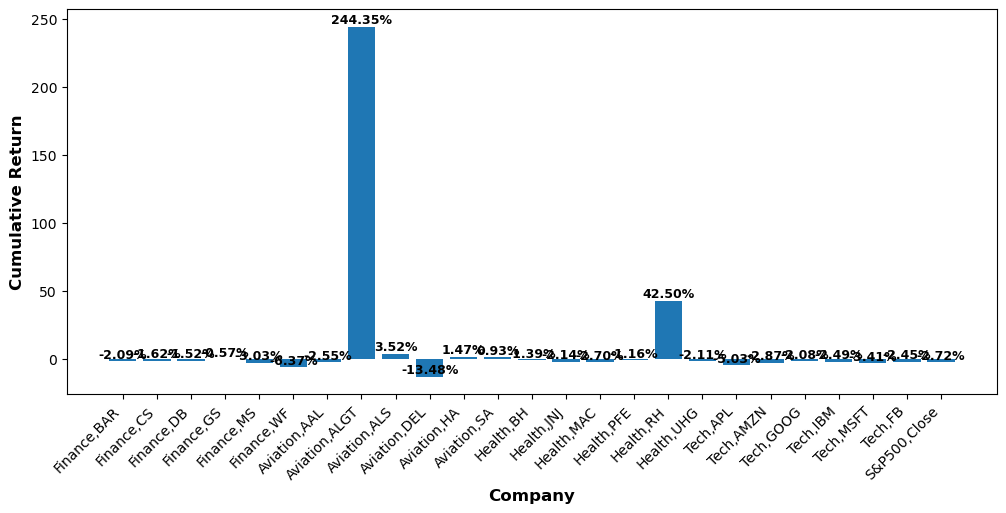

In [857]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))  # Increase figure size
bars = plt.bar(Cumulative_return["Company"], Cumulative_return["Cumulative_return"])

# Increase font size for X and Y labels
plt.xlabel("Company", fontsize=12, fontweight="bold")  
plt.ylabel("Cumulative Return", fontsize=12, fontweight="bold")  

# Increase font size for X-axis tick labels (company names)
plt.xticks(fontsize=10, rotation=45, ha="right")  
plt.yticks(fontsize=10)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of the bar)
        height + 0.08,  # Y position (top of the bar)
        f"{height:.2f}%",  # Format values to 2 decimal places
        ha="center",  # Center align text
        va="bottom",  # Position text just above the bar
        fontsize=9,
        fontweight="bold",
        color="black"
    )

plt.show()


# Sharpe Ratio

In [859]:
import numpy as np
s_ratio = pd.DataFrame({"Company":names})

sharpe_ratios = list((252*desc_daily.loc["mean"][1:]-0.0075)/(np.sqrt(252)*desc_daily.loc["std"][1:]))

s_ratio["Sharpe Ratio"] = sharpe_ratios

s_ratio.head

<bound method NDFrame.head of           Company  Sharpe Ratio
0     Finance,BAR     -0.417759
1      Finance,CS      0.280097
2      Finance,DB     -0.570520
3      Finance,GS     -0.483489
4      Finance,MS      0.382593
5      Finance,WF     -0.565741
6    Aviation,AAL     -0.049299
7   Aviation,ALGT     -0.404641
8    Aviation,ALS      0.369951
9    Aviation,DEL      0.002059
10    Aviation,HA      0.451894
11    Aviation,SA     -0.337763
12      Health,BH     -0.154833
13     Health,JNJ      0.063867
14     Health,MAC     -0.041047
15     Health,PFE      0.553227
16      Health,RH     -0.414800
17     Health,UHG      0.432238
18       Tech,APL     -0.097872
19      Tech,AMZN     -0.258912
20      Tech,GOOG     -0.796646
21       Tech,IBM     -0.226393
22      Tech,MSFT     -0.199447
23        Tech,FB      0.501341
24   S&P500,Close      0.448028>

In [860]:
s_ratio.to_excel("sharpe_ratio.xlsx", index = False)

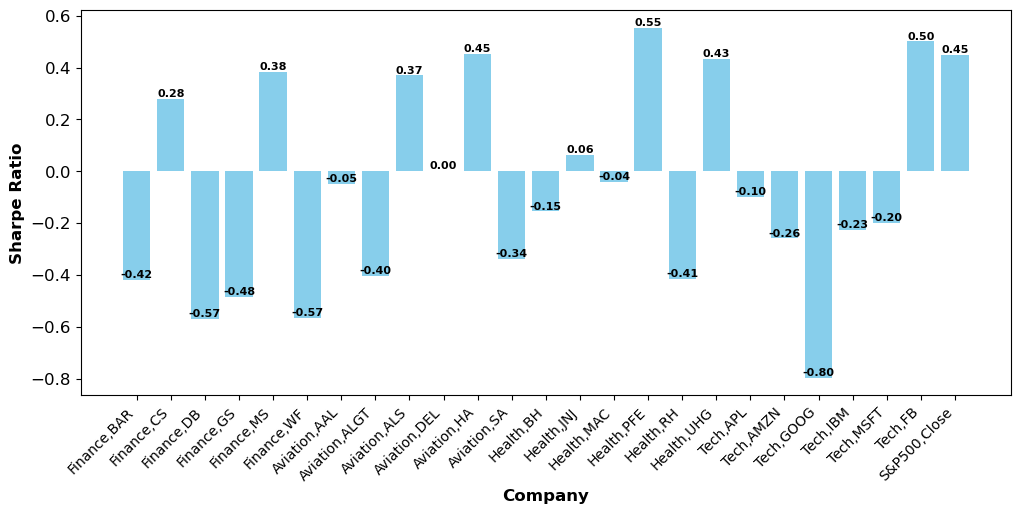

In [861]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))  # Increase figure size
bars = plt.bar(s_ratio["Company"], s_ratio["Sharpe Ratio"], color="skyblue")

# Increase font size for X and Y labels
plt.xlabel("Company", fontsize=12, fontweight="bold")  
plt.ylabel("Sharpe Ratio", fontsize=12, fontweight="bold")  

# Increase font size for X-axis tick labels (company names)
plt.xticks(fontsize=10, rotation=45, ha="right")  
plt.yticks(fontsize=12)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of the bar)
        height,  # Y position (top of the bar)
        f"{height:.2f}",  # Format values to 2 decimal places
        ha="center",  # Center align text
        va="bottom",  # Position text just above the bar
        fontsize=8,
        fontweight="bold",
        color="black"
    )

plt.show()


# Calculating Beta Values for each stock

## We'll use yfinance to get stock and market data and then calculate Beta.



In [705]:
!pip install yfinance


[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [862]:
# Visualizing the beta values of each stock
import pandas as pd
import numpy as np
import yfinance as yf
beta = pd.DataFrame({"Company":names})
beta_value = []
for i in Daily_return.columns[1:]:
    market_returns = Daily_return["S&P500_Close Daily Return"].iloc[1:]
    # stock_returns = Daily_return["Finance_BAR_Close Daily Return"].iloc[1:]
    # Compute covariance and variance
    cov_matrix = np.cov(Daily_return[i][1:], market_returns)
    covariance = cov_matrix[0, 1]  # Stock vs Market
    market_variance = np.var(market_returns,ddof=1)

    # Calculate Beta
    beta = round(covariance / market_variance, 4)
    beta_value.append(beta)
    #beta["Beta"] = beta_value
#     print(f"Beta of {i} relative to S&P 500: {beta:.4f}")


In [863]:
beta = pd.DataFrame({"Company":names,"Beta":beta_value})
beta

Company    Beta
0     Finance,BAR -0.0455
1      Finance,CS  0.0035
2      Finance,DB  0.0016
3      Finance,GS  0.0007
4      Finance,MS -0.0002
5      Finance,WF  0.0005
6    Aviation,AAL -0.0000
7   Aviation,ALGT  0.0044
8    Aviation,ALS -0.0004
9    Aviation,DEL  0.0002
10    Aviation,HA -0.0001
11    Aviation,SA  0.0001
12      Health,BH -0.0000
13     Health,JNJ -0.0021
14     Health,MAC  0.0001
15     Health,PFE -0.0062
16      Health,RH  0.0018
17     Health,UHG  0.0848
18       Tech,APL -0.0002
19      Tech,AMZN -0.0001
20      Tech,GOOG -0.0015
21       Tech,IBM  0.0011
22      Tech,MSFT -0.0002
23        Tech,FB  0.0003
24   S&P500,Close  1.0000

In [864]:
# A different mothod to calculate Beta to confirm the accuracy of our result
covariance_values = {}
for stock in Daily_return.columns[1:-1]:
    covariance_values[stock] =  Daily_return["S&P500_Close Daily Return"].cov(Daily_return[stock])

market_variance = Daily_return["S&P500_Close Daily Return"].var()

beta_value = { stock: covariance / market_variance for stock, covariance in covariance_values.items()}

beta_df = pd.DataFrame(list(beta_value.items()),columns = ["Stock", "Beta"])

print(beta_df)
    

                               Stock      Beta
0     Finance_BAR_Close Daily Return -0.045456
1      Finance_CS_Close Daily Return  0.003452
2      Finance_DB_Close Daily Return  0.001559
3      Finance_GS_Close Daily Return  0.000703
4      Finance_MS_Close Daily Return -0.000158
5      Finance_WF_Close Daily Return  0.000510
6    Aviation_AAL_Close Daily Return -0.000012
7   Aviation_ALGT_Close Daily Return  0.004357
8    Aviation_ALS_Close Daily Return -0.000421
9    Aviation_DEL_Close Daily Return  0.000170
10    Aviation_HA_Close Daily Return -0.000135
11    Aviation_SA_Close Daily Return  0.000102
12      Health_BH_Close Daily Return -0.000017
13     Health_JNJ_Close Daily Return -0.002115
14     Health_MAC_Close Daily Return  0.000116
15     Health_PFE_Close Daily Return -0.006233
16      Health_RH_Close Daily Return  0.001777
17     Health_UHG_Close Daily Return  0.084847
18       Tech_APL_Close Daily Return -0.000233
19      Tech_AMZN_Close Daily Return -0.000077
20      Tech_

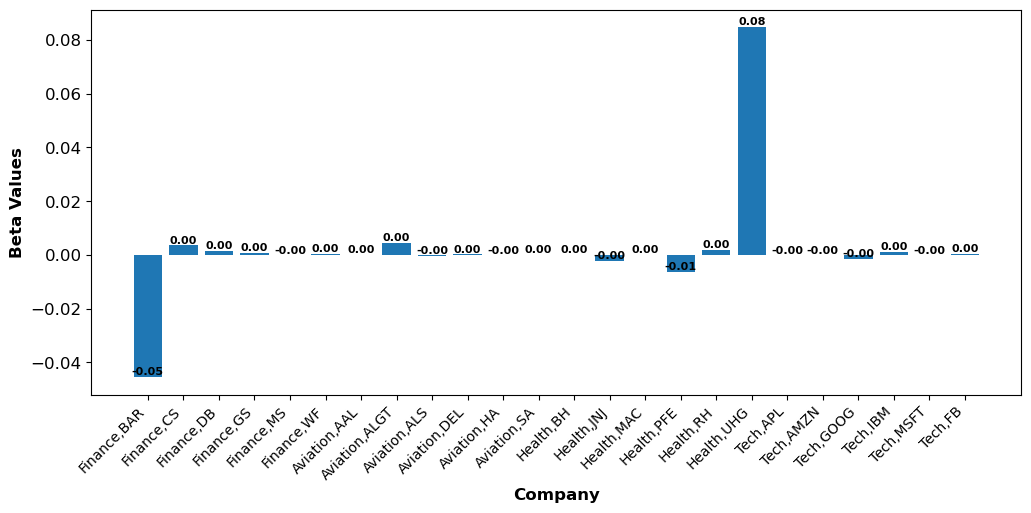

In [865]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))  # Increase figure size
bars = plt.bar(beta["Company"][0:-1], beta["Beta"][0:-1])

# Increase font size for X and Y labels
plt.xlabel("Company", fontsize=12, fontweight="bold")  
plt.ylabel("Beta Values", fontsize=12, fontweight="bold")  

# Increase font size for X-axis tick labels (company names)
plt.xticks(fontsize=10, rotation=45, ha="right")  
plt.yticks(fontsize=12)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of the bar)
        height,  # Y position (top of the bar)
        f"{height:.2f}",  # Format values to 4 decimal places for beta
        ha="center",  # Center align text
        va="bottom",  # Position text just above the bar
        fontsize=8,
        fontweight="bold",
        color="black"
    )

plt.show()


# Calculating CAPM for each stock

In [866]:
capms = ((beta["Beta"]+0.0075)*(Annualized_return["Annualized Return"]-0.0075))*100
capm = pd.DataFrame({"Company":names,"CAPM":list(capms)})
capm

Company         CAPM
0     Finance,BAR   248.788959
1      Finance,CS    29.272278
2      Finance,DB   -18.088827
3      Finance,GS   -16.753024
4      Finance,MS    12.806438
5      Finance,WF   -12.620763
6    Aviation,AAL    -0.494839
7   Aviation,ALGT  -353.548710
8    Aviation,ALS    14.203523
9    Aviation,DEL     0.083757
10    Aviation,HA     8.669165
11    Aviation,SA    -3.457213
12      Health,BH    -0.138298
13     Health,JNJ     0.820281
14     Health,MAC    -0.659519
15     Health,PFE     5.659965
16      Health,RH  -107.396076
17     Health,UHG    54.597971
18       Tech,APL    -1.515942
19      Tech,AMZN    -1.157016
20      Tech,GOOG    -7.093816
21       Tech,IBM    -4.365282
22      Tech,MSFT    -1.454527
23        Tech,FB    14.550581
24   S&P500,Close  7077.625396

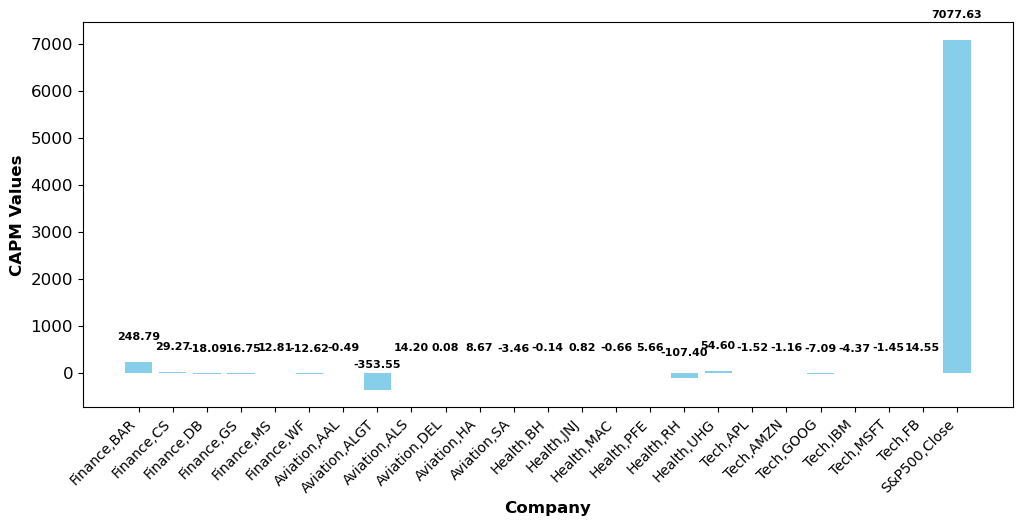

In [867]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))  # Increase figure size
bars = plt.bar(capm["Company"], capm["CAPM"], color="skyblue")

# Increase font size for X and Y labels
plt.xlabel("Company", fontsize=12, fontweight="bold")  
plt.ylabel("CAPM Values", fontsize=12, fontweight="bold")  

# Increase font size for X-axis tick labels (company names)
plt.xticks(fontsize=10, rotation=45, ha="right")  
plt.yticks(fontsize=12)

# Add value labels on top of bars with spacing
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of the bar)
        height + 0.06 * max(capm["CAPM"]),  # Y position (top of the bar with space)
        f"{height:.2f}",  # Format values to 4 decimal places
        ha="center",  # Center align text
        va="bottom",  # Position text just above the bar
        fontsize=8,
        fontweight="bold",
        color="black"
    )

plt.show()


# Portfolio Analysis

## Mr. Patrick Jyengar Portfolio

Mr. Patrick Jyengar wants to double his investment in the span on 5 years. He wants to invest in low risk stocks which would fetch him decent returns.
As per his profile Low risk stocks like ['Aviation_HA_Close', 'Health_JNJ_Close', 'Tech_FB_Close' ,'Finance_MS_Close'] are suitable to invest on.
Lets calculate the Risk and Returns associated with the above mentioned portfolio.
These 4 stock will give a high amount of return on the cost of a very decent risk.

In [869]:
import pandas as pd

# Generate business days (stock market working days) for the next 5 years
start_date = pd.to_datetime("today")  # Today's date
end_date = start_date + pd.DateOffset(years=5)  # 5 years from today

# Create a business day range (excluding weekends)
date_range = pd.bdate_range(start=start_date, end=end_date, freq="B")

# Create DataFrame
portfolio = pd.DataFrame({"Date": date_range})

print(portfolio.head())  # Display first 5 rows


        Date
0 2025-02-17
1 2025-02-18
2 2025-02-19
3 2025-02-20
4 2025-02-21


In [870]:
# Here we are selecting these stocks. and disbursing the total amount in all of them.
stocks = ['Aviation_HA_Close', 'Health_JNJ_Close', 'Tech_FB_Close' ,'Finance_MS_Close']
initial_weight_stocks_df  = np.array([0.25, 0.25, 0.25, 0.25])


In [871]:
# Taking all of the values from our mail dataframe for portfolio.
for i in stocks:
    portfolio[i]  = all_close[i]

In [872]:
portfolio.head()

Date  Aviation_HA_Close  Health_JNJ_Close  Tech_FB_Close  \
0 2025-02-17          -0.735912         -1.277875      -1.626651   
1 2025-02-18          -0.751694         -1.322962      -1.654044   
2 2025-02-19          -0.826218         -1.354462      -1.676654   
3 2025-02-20          -0.816573         -1.213640      -1.676654   
4 2025-02-21          -0.713116         -1.162376      -1.632521   

   Finance_MS_Close  
0         -0.381105  
1         -0.526041  
2         -0.655406  
3         -0.593119  
4         -0.527239

In [873]:
portfolio = portfolio.set_index('Date')

In [874]:
# Calculating the daily percentage change:

stocks_returns_daily = portfolio.pct_change()
stocks_returns_daily.head()

Aviation_HA_Close  Health_JNJ_Close  Tech_FB_Close  \
Date                                                             
2025-02-17                NaN               NaN            NaN   
2025-02-18           0.021445          0.035283       0.016840   
2025-02-19           0.099141          0.023810       0.013670   
2025-02-20          -0.011673         -0.103969       0.000000   
2025-02-21          -0.126696         -0.042240      -0.026322   

            Finance_MS_Close  
Date                          
2025-02-17               NaN  
2025-02-18          0.380306  
2025-02-19          0.245922  
2025-02-20         -0.095036  
2025-02-21         -0.111075

In [875]:
# let's calculate the avg daily returns:

avg_stocks_daily_returns = stocks_returns_daily.mean()
avg_stocks_daily_returns

Aviation_HA_Close    0.051263
Health_JNJ_Close    -0.021554
Tech_FB_Close        0.044214
Finance_MS_Close     0.071564
dtype: float64

In [876]:
#Calculating Risk of the stocks:

stock_risk= stocks_returns_daily.std()
stock_risk

Aviation_HA_Close    1.719628
Health_JNJ_Close     0.959187
Tech_FB_Close        2.318366
Finance_MS_Close     3.038612
dtype: float64

In [877]:
# Daily return from the portfolio

stocks_returns_daily['portfolio_daily_return'] = stocks_returns_daily.dot(initial_weight_stocks_df)
stocks_returns_daily.head()

Aviation_HA_Close  Health_JNJ_Close  Tech_FB_Close  \
Date                                                             
2025-02-17                NaN               NaN            NaN   
2025-02-18           0.021445          0.035283       0.016840   
2025-02-19           0.099141          0.023810       0.013670   
2025-02-20          -0.011673         -0.103969       0.000000   
2025-02-21          -0.126696         -0.042240      -0.026322   

            Finance_MS_Close  portfolio_daily_return  
Date                                                  
2025-02-17               NaN                     NaN  
2025-02-18          0.380306                0.113469  
2025-02-19          0.245922                0.095636  
2025-02-20         -0.095036               -0.052669  
2025-02-21         -0.111075               -0.076583

In [878]:
#Let's calculate the total returns of the portfolio:

allocated_stocks_daily_return = (initial_weight_stocks_df * avg_stocks_daily_returns)

portfolio_return = np.sum(allocated_stocks_daily_return)
portfolio_return*100

3.637160883671716

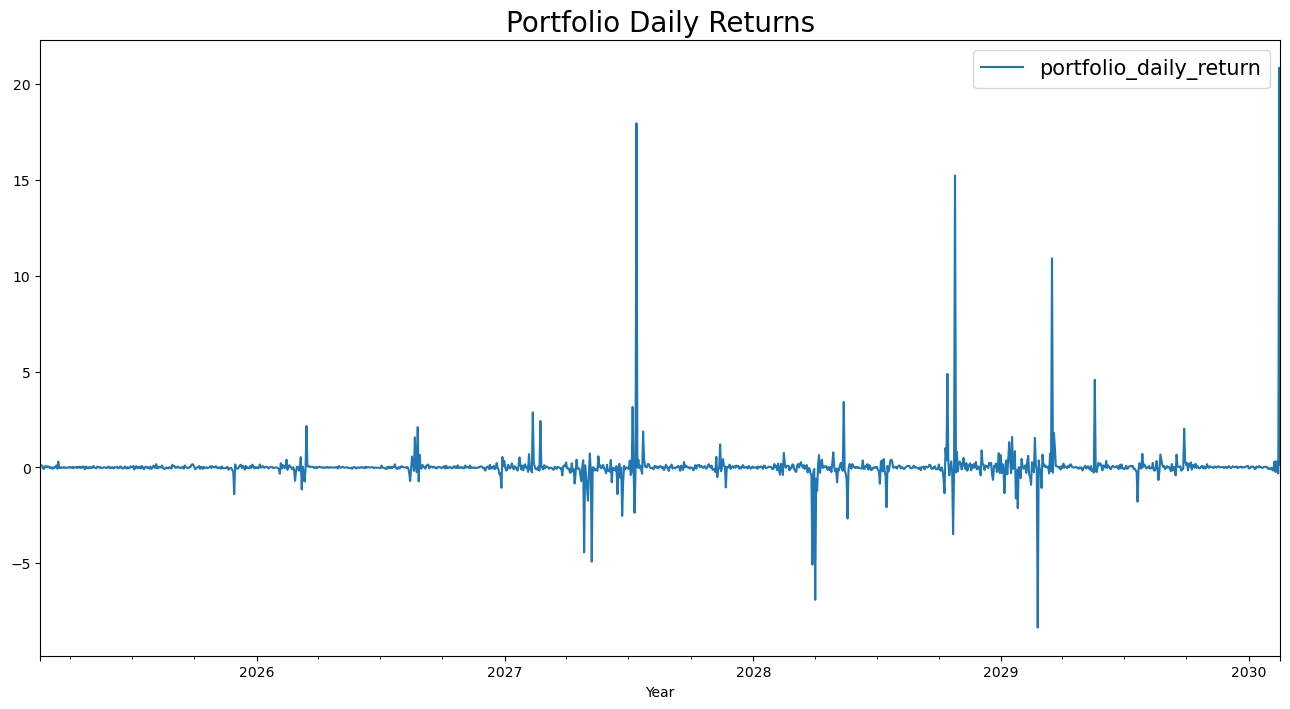

In [879]:
# Lets Plot the graph
plt.figure(figsize=(16,8))
stocks_returns_daily['portfolio_daily_return'].plot()
plt.title('Portfolio Daily Returns', fontsize = 20)
plt.legend(loc = 'best', fontsize = 15)
plt.xticks(rotation=0)
plt.xlabel("Year")
plt.show()

In [880]:
# Cumulative return from the portfolio

daily_cumulative_return = (1+stocks_returns_daily).cumprod()
daily_cumulative_return.tail(5)

Aviation_HA_Close  Health_JNJ_Close  Tech_FB_Close  \
Date                                                             
2030-02-11           1.746997         -0.883063      -0.514420   
2030-02-12           2.006719         -0.812013      -0.426343   
2030-02-13           1.911408         -0.812980      -0.371813   
2030-02-14           2.003144         -0.542797      -0.216909   
2030-02-15           1.930470         -0.794130      -0.333054   

            Finance_MS_Close  portfolio_daily_return  
Date                                                  
2030-02-11         -1.052398                0.193673  
2030-02-12         -0.219495                0.150366  
2030-02-13          0.016232                0.103446  
2030-02-14          1.380306                2.258593  
2030-02-15          0.751701                2.544753

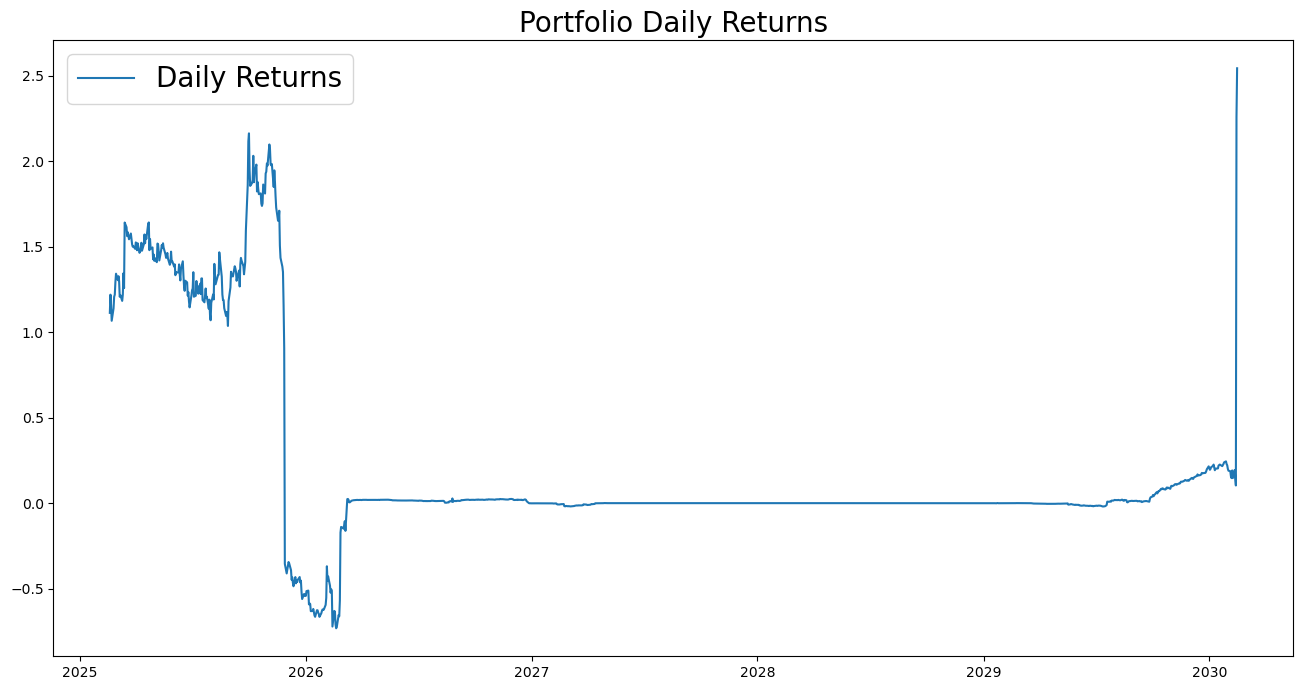

In [881]:
plt.figure(figsize=(16,8))
plt.plot(daily_cumulative_return['portfolio_daily_return'], label = 'Daily Returns')
plt.title('Portfolio Daily Returns', fontsize = 20)
plt.legend(loc = 'best', fontsize = 20)
plt.show()

In [882]:
# Covariance matrix for the portfolio
# Removing the last column (Portfolio_Daily_Return) from our calculation.

covariance_matrix_portfolio_s = stocks_returns_daily.iloc[:,:-1]
covariance_matrix_portfolio_s = (covariance_matrix_portfolio_s.cov())*252

covariance_matrix_portfolio_s

Aviation_HA_Close  Health_JNJ_Close  Tech_FB_Close  \
Aviation_HA_Close         745.194229         -2.982809      22.493262   
Health_JNJ_Close           -2.982809        231.850001      -2.174895   
Tech_FB_Close              22.493262         -2.174895    1354.455279   
Finance_MS_Close           -6.587750         -5.967596      -4.327329   

                   Finance_MS_Close  
Aviation_HA_Close         -6.587750  
Health_JNJ_Close          -5.967596  
Tech_FB_Close             -4.327329  
Finance_MS_Close        2326.756894

In [883]:
portfolio_variance_s = np.dot(initial_weight_stocks_df.T,np.dot(covariance_matrix_portfolio_s, initial_weight_stocks_df))

In [884]:
# Standard deviation (risk of portfolio):

portfolio_risk_s= np.sqrt(portfolio_variance_s)
portfolio_risk_s

17.064513923696595

In [886]:
# Assuming that the risk free rate is zero:

Sharpe_Ratio_S = (stocks_returns_daily['portfolio_daily_return'].mean() - Daily_return['S&P500_Close Daily Return'].mean())/ stocks_returns_daily['portfolio_daily_return'].std()
Sharpe_Ratio_S

-0.22551982961990763

In [887]:
#Let's Calculate Annualised sharpe ratio:

Annualised_Sharpe_Ratio_S = (252**0.5)*Sharpe_Ratio_S
Annualised_Sharpe_Ratio_S

-3.5800163093276023

In [888]:
# calculating the total return on investment:

invested_amount    = 500000
Cummulative_return = daily_cumulative_return['portfolio_daily_return'][-1]
Expected_Return    = round(invested_amount*Cummulative_return,2)
Expected_Earning   = round(Expected_Return-invested_amount,2)
print(f"""Invested Amount : {invested_amount}
         Expected Retunr  : {Expected_Return}
         Expected Earning : {Expected_Earning}""")

Invested Amount : 500000
         Expected Retunr  : 1272376.5
         Expected Earning : 772376.5


#### As Mr.Patrick Jyengar invests 5 Hundred Thousand Dollar in equities. The returns that he would get after 5 years of time period is 1.27 Million Dollar with more than 6 Hundred Thousand dollars of gain.

#### Mr. Peter Jyengar Portfolio

- Mr. Peter Jyengar on the other hand Consistent with his attitude towards risk, he prefers high-return investments. Believes that he can still bounce back in case of any occasional losses. 
- He Wants to invest 1 million dollar from company's cash and cash equivalents in the most high-margin stocks Expects high returns within 5 years for inorganic expansion of his company. 
- As per his profile High risk/High Returns stocks like Aviation,ALGT	, Health,RH	, Aviation,ALS are suitable to invest on. 
- Overall returns with these stocks would fetch him Maximum returns and also cater the Risk.

In [889]:
import pandas as pd

# Generate business days (stock market working days) for the next 5 years
start_date = pd.to_datetime("today")  # Today's date
end_date = start_date + pd.DateOffset(years=5)  # 5 years from today

# Create a business day range (excluding weekends)
date_range = pd.bdate_range(start=start_date, end=end_date, freq="B")

# Create DataFrame
portfolio = pd.DataFrame({"Date": date_range})

print(portfolio.head())  # Display first 5 rows


        Date
0 2025-02-17
1 2025-02-18
2 2025-02-19
3 2025-02-20
4 2025-02-21


In [890]:
stocks = ['Tech_AMZN_Close', 'Health_UHG_Close', 'Finance_MS_Close']
initial_weight_stocks_df  = np.array([0.33,0.33,0.33])


In [891]:
for i in stocks:
    portfolio[i]  = all_close[i]

In [892]:
portfolio.head()

Date  Tech_AMZN_Close  Health_UHG_Close  Finance_MS_Close
0 2025-02-17        -1.394830         -1.552301         -0.381105
1 2025-02-18        -1.403763         -1.578125         -0.526041
2 2025-02-19        -1.413499         -1.581237         -0.655406
3 2025-02-20        -1.409082         -1.565524         -0.593119
4 2025-02-21        -1.406204         -1.491317         -0.527239

In [893]:
portfolio = portfolio.set_index('Date')

In [894]:
# Calculating the daily percentage change:

stocks_returns_daily = portfolio.pct_change()
stocks_returns_daily.head()

Tech_AMZN_Close  Health_UHG_Close  Finance_MS_Close
Date                                                           
2025-02-17              NaN               NaN               NaN
2025-02-18         0.006404          0.016636          0.380306
2025-02-19         0.006936          0.001972          0.245922
2025-02-20        -0.003125         -0.009937         -0.095036
2025-02-21        -0.002043         -0.047401         -0.111075

In [895]:
# let's calculate the avg daily returns:

avg_stocks_daily_returns = stocks_returns_daily.mean()
avg_stocks_daily_returns

Tech_AMZN_Close    -0.007967
Health_UHG_Close    0.029614
Finance_MS_Close    0.071564
dtype: float64

In [896]:
#Calculating Risk of the stocks:

stock_risk= stocks_returns_daily.std()
stock_risk

Tech_AMZN_Close     0.399944
Health_UHG_Close    0.896043
Finance_MS_Close    3.038612
dtype: float64

In [897]:
# Daily return from the portfolio

stocks_returns_daily['portfolio_daily_return'] = stocks_returns_daily.dot(initial_weight_stocks_df)

In [898]:
stocks_returns_daily.tail(20)

Tech_AMZN_Close  Health_UHG_Close  Finance_MS_Close  \
Date                                                              
2030-01-21         0.020181          0.043484          0.031950   
2030-01-22         0.010775          0.140642          0.028801   
2030-01-23        -0.011738         -0.012437         -0.017497   
2030-01-24        -0.017587         -0.033649         -0.006411   
2030-01-25         0.024824          0.034209         -0.022942   
2030-01-28         0.016944          0.031207          0.057967   
2030-01-29        -0.019605         -0.030358         -0.177552   
2030-01-30        -0.066731         -0.006892         -0.112157   
2030-01-31        -0.108487         -0.234363         -0.260249   
2030-02-01        -0.051312         -0.186458         -0.211855   
2030-02-04         0.010137         -0.006208         -0.128699   
2030-02-05        -0.139596         -0.145421         -0.342162   
2030-02-06        -0.000937          0.019491         -0.108005   
2030-02-07         0.119637          0.333644          0.462026   
2030-02-08        -0.068435         -0.161407         -0.453321   
2030-02-11         0.109213          0.460558          0.334881   
2030-02-12        -0.076305         -0.072699         -0.791433   
2030-02-13        -0.036584          0.011044         -1.073952   
2030-02-14        -0.166327         -0.125196         84.035535   
2030-02-15         0.181104          0.090012         -0.455410   

            portfolio_daily_return  
Date                                
2030-01-21                0.031553  
2030-01-22                0.059472  
2030-01-23               -0.013752  
2030-01-24               -0.019023  
2030-01-25                0.011910  
2030-01-28                0.035019  
2030-01-29               -0.075080  
2030-01-30               -0.061308  
2030-01-31               -0.199023  
2030-02-01               -0.148376  
2030-02-04               -0.041174  
2030-02-05               -0.206969  
2030-02-06               -0.029519  
2030-02-07                0.302051  
2030-02-08               -0.225444  
2030-02-11                0.298535  
2030-02-12               -0.310345  
2030-02-13               -0.362832  
2030-02-14               27.635524  
2030-02-15               -0.060817

In [899]:
#Let's calculate the total returns of the portfolio:

allocated_stocks_daily_return = (initial_weight_stocks_df * avg_stocks_daily_returns)

portfolio_return = np.sum(allocated_stocks_daily_return)
portfolio_return*100

3.075957255256074

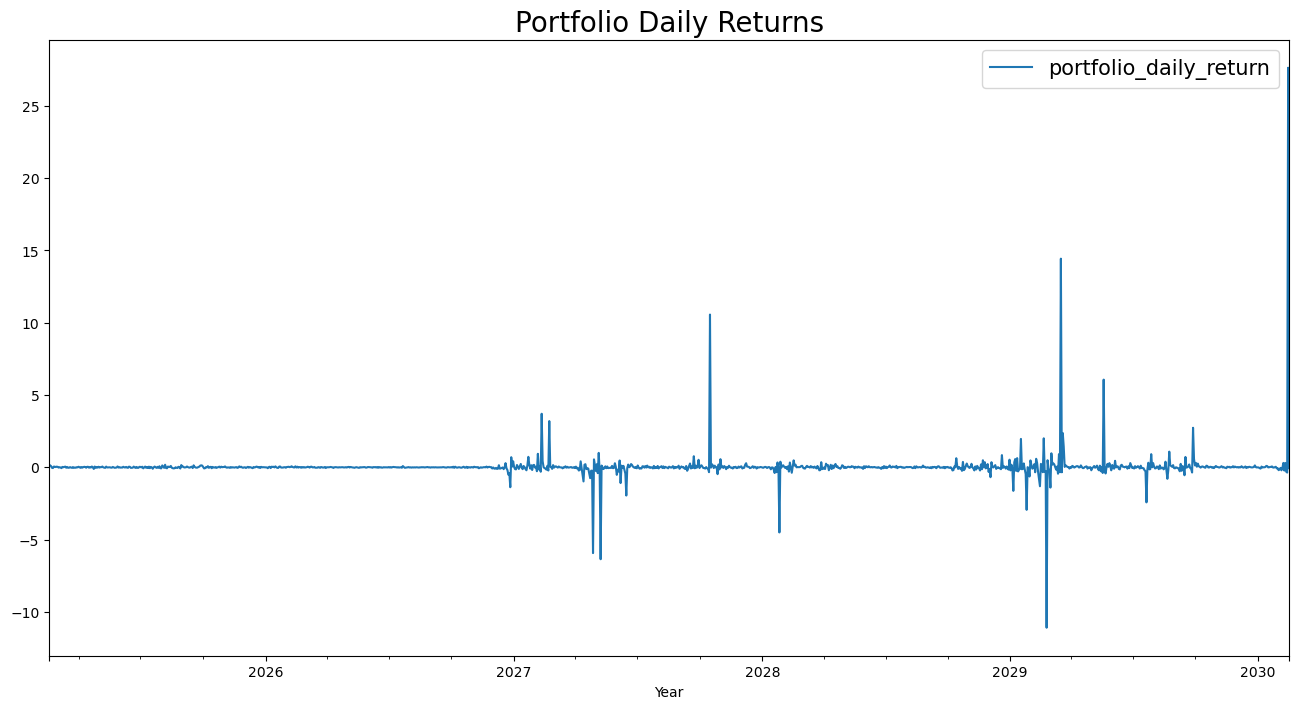

In [900]:
# Lets Plot the graph
plt.figure(figsize=(16,8))
stocks_returns_daily['portfolio_daily_return'].plot()
plt.title('Portfolio Daily Returns', fontsize = 20)
plt.legend(loc = 'best', fontsize = 15)
plt.xticks(rotation=0)
plt.xlabel("Year")
plt.show()

In [901]:
# Cumulative return from the portfolio

daily_cumulative_return = (1+stocks_returns_daily).cumprod()
daily_cumulative_return.head()

Tech_AMZN_Close  Health_UHG_Close  Finance_MS_Close  \
Date                                                              
2025-02-17              NaN               NaN               NaN   
2025-02-18         1.006404          1.016636          1.380306   
2025-02-19         1.013384          1.018641          1.719754   
2025-02-20         1.010218          1.008519          1.556316   
2025-02-21         1.008154          0.960714          1.383448   

            portfolio_daily_return  
Date                                
2025-02-17                     NaN  
2025-02-18                1.133104  
2025-02-19                1.228391  
2025-02-20                1.184572  
2025-02-21                1.121824

In [902]:
daily_cumulative_return.tail()

Tech_AMZN_Close  Health_UHG_Close  Finance_MS_Close  \
Date                                                              
2030-02-11        -0.686780         -0.890546         -1.052398   
2030-02-12        -0.634375         -0.825804         -0.219495   
2030-02-13        -0.611167         -0.834924          0.016232   
2030-02-14        -0.509514         -0.730395          1.380306   
2030-02-15        -0.601789         -0.796139          0.751701   

            portfolio_daily_return  
Date                                
2030-02-11              520.972189  
2030-02-12              359.291310  
2030-02-13              228.928773  
2030-02-14             6555.495427  
2030-02-15             6156.809044

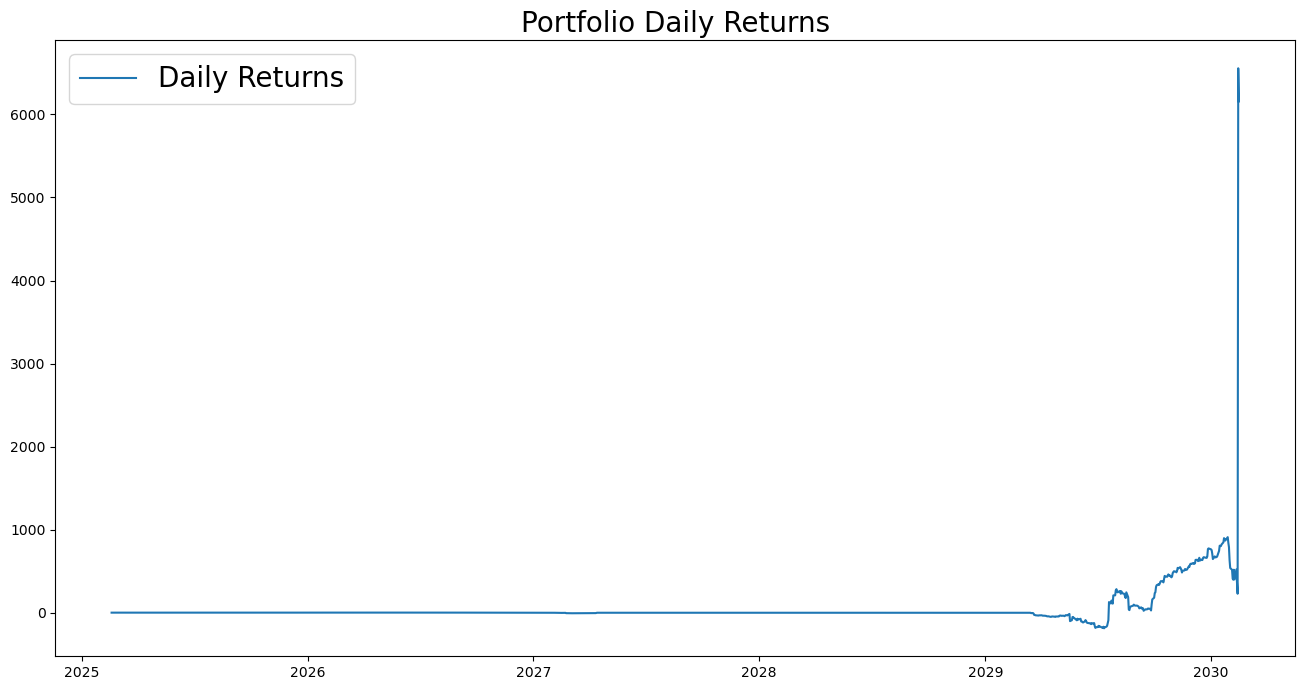

In [903]:
plt.figure(figsize=(16,8))
plt.plot(daily_cumulative_return['portfolio_daily_return'], label = 'Daily Returns')
plt.title('Portfolio Daily Returns', fontsize = 20)
plt.legend(loc = 'best', fontsize = 20)
plt.show()

In [904]:
# Covariance matrix for the portfolio
# Removing the last column (Portfolio_Daily_Return) from our calculation.

covariance_matrix_portfolio_s = stocks_returns_daily.iloc[:,:-1]
covariance_matrix_portfolio_s = (covariance_matrix_portfolio_s.cov())*252

covariance_matrix_portfolio_s

Tech_AMZN_Close  Health_UHG_Close  Finance_MS_Close
Tech_AMZN_Close         40.308658          0.362973         -1.942637
Health_UHG_Close         0.362973        202.328927         -1.207421
Finance_MS_Close        -1.942637         -1.207421       2326.756894

In [905]:
portfolio_variance_s = np.dot(initial_weight_stocks_df.T,np.dot(covariance_matrix_portfolio_s, initial_weight_stocks_df))

In [906]:
# Standard deviation (risk of portfolio):

portfolio_risk_s= np.sqrt(portfolio_variance_s)
portfolio_risk_s

16.709279806147823

In [907]:
# Assuming that the risk free rate is zero:

Sharpe_Ratio_S = (stocks_returns_daily['portfolio_daily_return'].mean() - Daily_return['S&P500_Close Daily Return'].mean())/ stocks_returns_daily['portfolio_daily_return'].std()
Sharpe_Ratio_S

-0.2356459783089621

In [908]:
#Let's Calculate Annualised sharpe ratio:

Annualised_Sharpe_Ratio_S = (252**0.5)*Sharpe_Ratio_S
Annualised_Sharpe_Ratio_S

-3.7407639363482077

In [909]:
# calculating the total return on investment:

invested_amount    = 1000000
Cummulative_return = daily_cumulative_return['portfolio_daily_return'][-1]
Expected_Return    = round(invested_amount*Cummulative_return,2)
Expected_Earning   = round(Expected_Return-invested_amount,2)
print(f"""Invested Amount : {invested_amount}
         Expected Retunr  : {Expected_Return}
         Expected Earning : {Expected_Earning}""")

Invested Amount : 1000000
         Expected Retunr  : 6156809043.91
         Expected Earning : 6155809043.91


#### As Mr. Peter Jyengar invests 1 Million Dollars in equities. The returns that he would get after 5 years of time period would be enormous and help him for the ingornic expansion of JWW.